<a href="https://colab.research.google.com/github/M123shashank/CP2-TED-Talk-Views-Prediction/blob/main/TED_Talk_Views_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> **Project: TED Talk Views Prediction** <b> <u>




##**Business Context**

### _TED is devoted to spreading powerful ideas on just about any topic. These datasets contain over 4,000 TED talks including transcripts in many languages. Founded in 1984 by Richard Salman as a nonprofit organization that aimed at bringing experto from the fields of Technology, Entertainment, and Design together, TED Conferences have gone on to become the Mecca of ideas from virtually all walks of life. As of 2015, TED and its sister TED chapters have published more than 2000 talks for free consumption by the masses and its speaker list boasts of the likes of Al Gore, Jimmy Wales, Shahrukh Khan, and Bill Gates. The main objective is to build a predictive model, which could help in predicting the views of the videos uploaded on the TEDx website._

## **Problem Statement**

###**The objective of this project is to develop a predictive model that can accurately forecast the number of views for videos uploaded on the TEDx website. With over 4,000 TED talks available, encompassing a wide range of topics and languages, TED has become a global platform for spreading powerful ideas. By analyzing various factors such as talk content, speaker information, and other relevant attributes, the goal is to create a model that can provide insights into the popularity and viewership potential of TEDx videos. This predictive model will help TED and its contributors gain a better understanding of the factors influencing video views, allowing them to optimize content promotion, engage audiences, and enhance the overall impact of their talks.**

## <b> Data Description </b>

### <b>Attribute Information: </b>
Brief description of the data columns, you will find in the data file:

* talk_id : Unique Identifier for the TED talk
* title : Title of the TED talk
* speaker_1 : Main speaker of the talk
* all_speakers : List of all speakers in the talk
* occupations : Occupations or professions of the speakers
* about_speakers : Information or background about the speakers
* views : Number of views the talk has received
* recorded_date : Date when the talk was recorded
* published_date : Date when the talk was published
* event : Event or conference where the talk took place
* native_lang : Native language of the talk (abbreviated)
* available_lang : Available languages for the talk (abbreviated)
* comments : Number of comments on the talk
* duration : Duration of the talk in minutes
* topics : Topics covered in the talk
* related_talks : Related TED talks that are recommended
* url : URL or link to the talk
* description : Description or summary of the talk
* transcript : Full transcript of the talk


## **Importing**

In [97]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

from scipy.stats import norm
from scipy import stats


# Datatime library for Date columns
from datetime import datetime
import datetime as dt

# for remove Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Preprocessing libraries
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import PowerTransformer

# For build pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline


# Machine learning models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor, AdaBoostRegressor
from sklearn.ensemble import VotingRegressor,StackingRegressor


# for plot decision tree
from sklearn import tree

# Model selection libraries
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

# importing XGB regressor
from xgboost import XGBRegressor

# Metrics libraries for model evaluation
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error

# Warnings module handles warnings in Python
import warnings
warnings.filterwarnings('ignore')

In [98]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [99]:
# Importing Dataset
data_ted = pd.read_csv('/content/drive/MyDrive/AlmaBetter/ML Projects/1 Regression_Ted_Talk_Views_Prediction Project/data_ted_talks.csv')

## **Dataset Inspection**

In [100]:
#First Look at the dataset
data_ted.head()

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25,2006-06-27,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",272.0,977,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre..."
1,92,The best stats you've ever seen,Hans Rosling,{0: 'Hans Rosling'},{0: ['global health expert; data visionary']},"{0: 'In Hans Rosling’s hands, data sings. Glob...",14501685,2006-02-22,2006-06-27,TED2006,en,"['ar', 'az', 'bg', 'bn', 'bs', 'cs', 'da', 'de...",628.0,1190,"['Africa', 'Asia', 'Google', 'demo', 'economic...","{2056: ""Own your body's data"", 2296: 'A visual...",https://www.ted.com/talks/hans_rosling_the_bes...,You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac..."
2,7,Simplicity sells,David Pogue,{0: 'David Pogue'},{0: ['technology columnist']},{0: 'David Pogue is the personal technology co...,1920832,2006-02-24,2006-06-27,TED2006,en,"['ar', 'bg', 'de', 'el', 'en', 'es', 'fa', 'fr...",124.0,1286,"['computers', 'entertainment', 'interface desi...","{1725: '10 top time-saving tech tips', 2274: '...",https://www.ted.com/talks/david_pogue_simplici...,New York Times columnist David Pogue takes aim...,"(Music: ""The Sound of Silence,"" Simon & Garfun..."
3,53,Greening the ghetto,Majora Carter,{0: 'Majora Carter'},{0: ['activist for environmental justice']},{0: 'Majora Carter redefined the field of envi...,2664069,2006-02-26,2006-06-27,TED2006,en,"['ar', 'bg', 'bn', 'ca', 'cs', 'de', 'en', 'es...",219.0,1116,"['MacArthur grant', 'activism', 'business', 'c...",{1041: '3 stories of local eco-entrepreneurshi...,https://www.ted.com/talks/majora_carter_greeni...,"In an emotionally charged talk, MacArthur-winn...",If you're here today — and I'm very happy that...
4,66,Do schools kill creativity?,Sir Ken Robinson,{0: 'Sir Ken Robinson'},"{0: ['author', 'educator']}","{0: ""Creativity expert Sir Ken Robinson challe...",65051954,2006-02-25,2006-06-27,TED2006,en,"['af', 'ar', 'az', 'be', 'bg', 'bn', 'ca', 'cs...",4931.0,1164,"['children', 'creativity', 'culture', 'dance',...","{865: 'Bring on the learning revolution!', 173...",https://www.ted.com/talks/sir_ken_robinson_do_...,Sir Ken Robinson makes an entertaining and pro...,Good morning. How are you? (Audience) Good. It...


In [101]:
data_ted.tail()

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript
4000,62678,"Crisis support for the world, one text away",Nancy Lublin,{0: 'Nancy Lublin'},{0: ['health activist']},"{0: 'Nancy Lublin, cofounder and CEO of Crisis...",502934,2020-04-22,2020-04-27,TED2020: The Prequel,en,['en'],6.0,690,"['activism', 'data', 'technology', 'mental hea...",{2362: 'How data from a crisis text line is sa...,https://www.ted.com/talks/nancy_lublin_crisis_...,What if we could help people in crisis anytime...,"""I'm 14, and I want to go home."" ""My name is B..."
4001,62782,The dark history of IQ tests,Stefan C Dombrowski,{0: 'Stefan C Dombrowski'},NaN,NaN,307187,2020-04-27,2020-04-27,TED-Ed,en,"['en', 'es', 'my', 'pt-br']",NaN,346,"['TED-Ed', 'education', 'history', 'animation'...",{35386: 'How does the Rorschach inkblot test w...,https://www.ted.com/talks/stefan_c_dombrowski_...,"In 1905, psychologists Alfred Binet and Théodo...","In 1905, psychologists Alfred Binet and Théodo..."
4002,62263,"How ""policing for profit"" undermines your rights",Dick M. Carpenter II,{0: 'Dick M. Carpenter II'},{0: ['law researcher']},{0: 'Dick M. Carpenter II studies cutting edge...,464414,2019-06-22,2020-04-28,TEDxMileHigh,en,['en'],9.0,774,"['society', 'law', 'policy', 'justice system',...","{2406: 'I love being a police officer, but we ...",https://www.ted.com/talks/dick_m_carpenter_ii_...,"Many countries have an active, centuries-old l...",Picture yourself driving down the road tomorro...
4003,62784,The electrifying speeches of Sojourner Truth,Daina Ramey Berry,{0: 'Daina Ramey Berry'},NaN,NaN,56582,2020-04-28,2020-04-30,TED-Ed,en,['en'],NaN,257,"['TED-Ed', 'education', 'animation', 'United S...",{20973: 'The breathtaking courage of Harriet T...,https://www.ted.com/talks/daina_ramey_berry_th...,Isabella Baumfree was born into slavery in lat...,"In early 1828, Sojourner Truth approached the ..."
4004,62794,The most important anus in the ocean,Cella Wright,{0: 'Cella Wright'},NaN,NaN,0,2020-04-30,2020-04-30,TED-Ed,en,['en'],NaN,281,"['animals', 'TED-Ed', 'animation', 'oceans', '...","{62347: 'The bug that poops candy', 29159: 'In...",https://www.ted.com/talks/cella_wright_the_mos...,Is it a fuzzy sock? An overripe banana? A mold...,Can you guess what you’re looking at? Is it a ...


* We can observe that there are some Null values present in the dataset.
* There are some rows showing views as 0, it looks like missing value as It's almost impossible to have zero views on TED talks channel.
* The Null values in comments section may be because of comments disabled on video or due to some inconsistency problem. We will deal with its values later on.

In [102]:
data_ted.shape

(4005, 19)

The above result shows that my data has 4005 rows/data records and 19 columns/features.

In [103]:
#Detailed information about the type of data and features with missing values
data_ted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4005 entries, 0 to 4004
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   talk_id         4005 non-null   int64  
 1   title           4005 non-null   object 
 2   speaker_1       4005 non-null   object 
 3   all_speakers    4001 non-null   object 
 4   occupations     3483 non-null   object 
 5   about_speakers  3502 non-null   object 
 6   views           4005 non-null   int64  
 7   recorded_date   4004 non-null   object 
 8   published_date  4005 non-null   object 
 9   event           4005 non-null   object 
 10  native_lang     4005 non-null   object 
 11  available_lang  4005 non-null   object 
 12  comments        3350 non-null   float64
 13  duration        4005 non-null   int64  
 14  topics          4005 non-null   object 
 15  related_talks   4005 non-null   object 
 16  url             4005 non-null   object 
 17  description     4005 non-null   o

1. _We can see that most of the data is categorical or textual._

2. _We can also observe that there are only 4 features having some missing values._

3. _Incorrect data-type assigned to `recorded_date` , `published_date` , `comments`._

In [104]:
# check null values count
data_ted.isnull().sum()

talk_id             0
title               0
speaker_1           0
all_speakers        4
occupations       522
about_speakers    503
views               0
recorded_date       1
published_date      0
event               0
native_lang         0
available_lang      0
comments          655
duration            0
topics              0
related_talks       0
url                 0
description         0
transcript          0
dtype: int64

- occupations, about_speakers, comments have a lot of null values.

In [105]:
# describing only the columns having numeric data
data_ted.describe().T

,count,mean,std,min,25%,50%,75%,max
talk_id,4005.0,1.243254e+04,1.744758e+04,1.0,1252.0,2333.0,23777.0,62794.0
views,4005.0,2.148006e+06,3.451226e+06,0.0,882069.0,1375508.0,2133110.0,65051954.0
comments,3350.0,1.619970e+02,2.688389e+02,0.0,38.0,89.0,188.0,6449.0
duration,4005.0,7.240112e+02,3.617755e+02,60.0,393.0,738.0,974.0,3922.0


In [106]:
data_ted.describe(percentiles=[.01,.25,.50,.75,.80,.99]).T

,count,mean,std,min,1%,25%,50%,75%,80%,99%,max
talk_id,4005.0,1.243254e+04,1.744758e+04,1.0,44.04,1252.0,2333.0,23777.0,24402.6,60751.60,62794.0
views,4005.0,2.148006e+06,3.451226e+06,0.0,39087.96,882069.0,1375508.0,2133110.0,2475286.0,16299833.68,65051954.0
comments,3350.0,1.619970e+02,2.688389e+02,0.0,5.00,38.0,89.0,188.0,227.0,1038.73,6449.0
duration,4005.0,7.240112e+02,3.617755e+02,60.0,185.00,393.0,738.0,974.0,1020.0,1601.12,3922.0


- It looks like 'views' have outliers at both the ends, 'comments' & 'duration' have outliers at the upper end.
- there are some rows where comments value is 0, and some rows where views value is 0 (strange).

In [107]:
data_ted[data_ted['comments']== 0]

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript
3893,57920,The power of the Afro pick,Jon Gray,{0: 'Jon Gray'},"{0: ['food enthusiast', 'dishwasher']}",{0: 'Culinary evangelist Jon Gray is the voice...,208222,2020-02-04,2020-02-17,Small Thing Big Idea,en,"['ar', 'en', 'es', 'fr', 'tr']",0.0,213,"['design', 'history', 'culture', 'creativity',...",{44259: 'The next big thing is coming from the...,https://www.ted.com/talks/jon_gray_the_power_o...,The Afro pick is much more than a styling tool...,"You don't really look at a toothbrush and say,..."
3898,58706,How surfboards connect us to nature,Yves Béhar,{0: 'Yves Béhar'},{0: ['designer']},"{0: 'Yves Béhar is a designer, entrepreneur an...",181783,2020-02-11,2020-02-18,Small Thing Big Idea,en,"['ar', 'en', 'es', 'fr', 'pt-br', 'tr']",0.0,203,"['oceans', 'design', 'creativity', 'water', 's...","{57920: 'The power of the Afro pick', 57917: '...",https://www.ted.com/talks/yves_behar_how_surfb...,Here's how the surfboard changed our relations...,Riding a wave is like suddenly gaining speed a...


In [108]:
data_ted[data_ted['views']== 0]

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript
2813,17850,Por qué necesitamos proteger el alta mar,Enric Sala,{0: 'Enric Sala'},{0: ['marine ecologist']},{0: 'Dr. Enric Sala is a former university pro...,0,2018-04-26,2018-06-06,TED en Español en NYC,es,"['en', 'es']",NaN,772,"['environment', 'economics', 'biosphere', 'nat...","{17733: ""Let's turn the high seas into the wor...",https://www.ted.com/talks/enric_sala_por_que_n...,Estamos pescando más rápido que la capacidad d...,If you randomly jumped in any point of the sea...
3056,29009,Cómo usar el arte de la fotografía para restau...,Alejandro Chaskielberg,{0: 'Alejandro Chaskielberg'},{0: ['photographer']},"{0: 'Alejandro Chaskielberg is a photographer,...",0,2018-11-05,2018-11-29,TEDxRiodelaPlata,es,"['en', 'es', 'pt']",NaN,862,"['art', 'photography', 'community', 'history',...",{2854: 'How your pictures can help reclaim los...,https://www.ted.com/talks/alejandro_chaskielbe...,¿Qué le puede suceder a la memoria cuando la e...,"Recently, my daughter and I decided to give aw..."
3068,29688,Por qué deberíamos comer más bichos,Renata di Tullio,{0: 'Renata di Tullio'},{0: ['técnica agropecuaria y agroalimentaria']},{0: 'Rena es Técnica Agropecuaria y Agroalimen...,0,2018-11-05,2018-12-07,TEDxRiodelaPlata,es,"['en', 'es', 'nl']",NaN,417,"['global issues', 'science', 'insects', 'food'...","{2427: 'The case for fish farming', 1018: 'Why...",https://www.ted.com/talks/renata_di_tullio_por...,"Have you ever considered crickets, houseflies ...",I'm passionate about insects for two reasons. ...
3520,43755,Can dogs sniff out malaria?,James Logan,{0: 'James Logan'},"{0: ['biologist', 'medical entomologist']}",{0: 'Professor James Logan leads an internatio...,0,2019-05-18,2019-06-11,TEDxLondon,en,"['en', 'pt-br', 'ru', 'zh-tw']",NaN,1099,"['health', 'public health', 'animals', 'smell'...",{1819: '3 reasons we still haven’t gotten rid ...,https://www.ted.com/talks/james_logan_can_dogs...,"Each year, hundreds of thousands of people aro...",Malaria is still one of the biggest killers on...
3790,55342,¿Como será el cine del futuro?,Diego Prilusky,{0: 'Diego Prilusky'},{0: ['productor audiovisual']},"{0: 'Diego viene del mundo de la producción, l...",0,2019-10-24,2019-12-19,TEDxRiodelaPlata,es,"['en', 'es', 'it']",NaN,743,"['technology', 'film', 'movies', 'entertainmen...","{1476: 'The shared wonder of film', 403: ""A to...",https://www.ted.com/talks/diego_prilusky_como_...,"Desde las películas western, hasta las cintas ...",The art of movies has existed for more than 10...
4004,62794,The most important anus in the ocean,Cella Wright,{0: 'Cella Wright'},NaN,NaN,0,2020-04-30,2020-04-30,TED-Ed,en,['en'],NaN,281,"['animals', 'TED-Ed', 'animation', 'oceans', '...","{62347: 'The bug that poops candy', 29159: 'In...",https://www.ted.com/talks/cella_wright_the_mos...,Is it a fuzzy sock? An overripe banana? A mold...,Can you guess what you’re looking at? Is it a ...


- 2 columns have value = 0 for comments.
- 6 rows have views = 0, this looks impossible & hence a missing value. Since, we have a very large dataset and views missing are very small, we can simply remove these records.

In [109]:
#let us describe all the features
data_ted.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
talk_id,4005.0,NaN,NaN,NaN,12432.538327,17447.576262,1.0,1252.0,2333.0,23777.0,62794.0
title,4005,4005,Averting the climate crisis,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
speaker_1,4005,3274,Alex Gendler,34,NaN,NaN,NaN,NaN,NaN,NaN,NaN
all_speakers,4001,3306,{0: 'Alex Gendler'},34,NaN,NaN,NaN,NaN,NaN,NaN,NaN
occupations,3483,2049,{0: ['writer']},53,NaN,NaN,NaN,NaN,NaN,NaN,NaN
about_speakers,3502,2977,{0: 'Alex Rosenthal takes everyday experiences...,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
views,4005.0,NaN,NaN,NaN,2148005.573783,3451225.523659,0.0,882069.0,1375508.0,2133110.0,65051954.0
recorded_date,4004,1334,2017-04-24,97,NaN,NaN,NaN,NaN,NaN,NaN,NaN
published_date,4005,2962,2017-09-07,27,NaN,NaN,NaN,NaN,NaN,NaN,NaN
event,4005,459,TED-Ed,556,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [110]:
# Check for duplicated data records
data_ted.duplicated().sum()

0

In [111]:
# Let us check for those features where dupliaction can cause problems
data_ted.duplicated(subset=['talk_id','title','speaker_1']).sum()

0

In [112]:
# checking unique native langauages
data_ted['native_lang'].unique()

array(['en', 'fr', 'de', 'pt', 'ko', 'zh-cn', 'ar', 'pt-br', 'es', 'ja',
       'it', 'hi'], dtype=object)

## **Observed issues in the records**

- Incorrect data-type assigned to recorded_date , published_date , comments : `Datatype issue`

- `Occupations` section has 522 missing values, `comments` section has 655 missing which need to be filled : `Missing data`

- We need to find solution for the outliers in features like views, comments and duration : Outlier detection & solution, we will deal with issue later.

- 6 rows having view == 0 needs to be removed : `Removing data`

- We will deal with untidy data like `topics` later.



## **Understanding the data & Preparing the plan**

**Process ->>** Removing data ->> Missing data ->> datatype issue

Important features which may affect the views maybe:
1. Title of the talk: More relevant or interesting the title is, more will be the audience.
2. Name of the speaker: In general, less people will watch unfamous speakers.
3. Occupation of speaker: The biggest portion of the audience that can connect to the occupation, more will be views.
4. available_lang: The more number of languages, more reach to audience.
5. comments: More number of comments, more attraction to audience.
6. Topics: General topics will attract the audience.

# **Data Preprocessing**

## **Data Cleaning**

In [113]:
# create a duplicate data frame from original
TEDtalks_df = data_ted.copy()

In [114]:
#Let us remove the data having views == 0
TEDtalks_df = TEDtalks_df[TEDtalks_df['views']!= 0]

In [115]:
# check if any data of views have value 0
print((TEDtalks_df['views'] == 0).sum())

0


In [116]:
# we will remove all the columns which are not useful for us
TEDtalks_df.drop(['talk_id','all_speakers','about_speakers','related_talks','url','description','transcript'], axis = 1, inplace = True)


In [117]:
# rename column speaker_1 to speaker
TEDtalks_df.rename(columns={'speaker_1': 'speaker'}, inplace=True)

In [118]:
TEDtalks_df.head()

,title,speaker,occupations,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics
0,Averting the climate crisis,Al Gore,{0: ['climate advocate']},3523392,2006-02-25,2006-06-27,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",272.0,977,"['alternative energy', 'cars', 'climate change..."
1,The best stats you've ever seen,Hans Rosling,{0: ['global health expert; data visionary']},14501685,2006-02-22,2006-06-27,TED2006,en,"['ar', 'az', 'bg', 'bn', 'bs', 'cs', 'da', 'de...",628.0,1190,"['Africa', 'Asia', 'Google', 'demo', 'economic..."
2,Simplicity sells,David Pogue,{0: ['technology columnist']},1920832,2006-02-24,2006-06-27,TED2006,en,"['ar', 'bg', 'de', 'el', 'en', 'es', 'fa', 'fr...",124.0,1286,"['computers', 'entertainment', 'interface desi..."
3,Greening the ghetto,Majora Carter,{0: ['activist for environmental justice']},2664069,2006-02-26,2006-06-27,TED2006,en,"['ar', 'bg', 'bn', 'ca', 'cs', 'de', 'en', 'es...",219.0,1116,"['MacArthur grant', 'activism', 'business', 'c..."
4,Do schools kill creativity?,Sir Ken Robinson,"{0: ['author', 'educator']}",65051954,2006-02-25,2006-06-27,TED2006,en,"['af', 'ar', 'az', 'be', 'bg', 'bn', 'ca', 'cs...",4931.0,1164,"['children', 'creativity', 'culture', 'dance',..."


In [119]:
TEDtalks_df.shape

(3999, 12)

In [120]:
TEDtalks_df.columns

Index(['title', 'speaker', 'occupations', 'views', 'recorded_date',
       'published_date', 'event', 'native_lang', 'available_lang', 'comments',
       'duration', 'topics'],
      dtype='object')

## **Handling Missing Data**

In [121]:
# missing data percentage
def missing_values():
  missing = TEDtalks_df.columns[TEDtalks_df.isnull().any()].tolist()
  return missing

print('Missing Data Percentage')
print('~'*50)
print(round(TEDtalks_df[missing_values()].isnull().sum().sort_values(ascending = False)/len(TEDtalks_df)*100,2))

Missing Data Percentage
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
comments         16.23
occupations      13.03
recorded_date     0.03
dtype: float64


### *Comments*

The missing data is less than 50% and the column is numerical. Comments is missing 655 observations. We will impute with the median/mean value.

<Axes: xlabel='comments', ylabel='Density'>

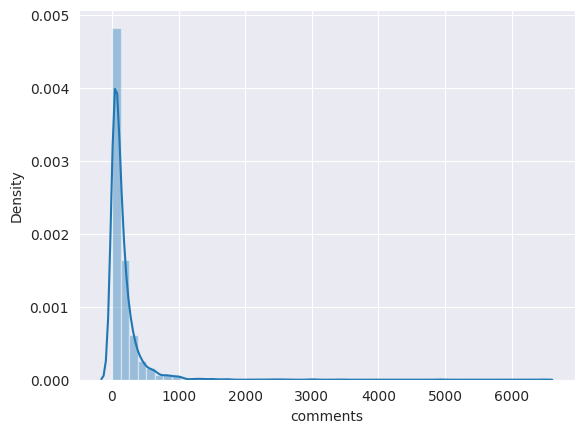

In [122]:
sns.distplot(TEDtalks_df.comments.dropna())

The data is positively skewed and hence we will impute it with median


In [123]:
TEDtalks_df['comments'] = TEDtalks_df['comments'].fillna(TEDtalks_df['comments'].median())
print('comments Missing After:', TEDtalks_df['comments'].isnull().sum())

comments Missing After: 0


### *Occupations*

The missing data is less than 50% and the column is textual, hence we will replace missing values with 'None'.

In [124]:
TEDtalks_df['occupations'] = TEDtalks_df['occupations'].fillna('None')
print('occupations Missing After:', TEDtalks_df['occupations'].isnull().sum())

occupations Missing After: 0


### *Recorded_date*

There is only one missing data here, hence, we will simply copy the  publishing_date to that empty recorded_date place.

In [125]:
TEDtalks_df[TEDtalks_df['recorded_date'].isnull()]

,title,speaker,occupations,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics
3831,The unpaid work that GDP ignores -- and why it...,Marilyn Waring,{0: ['economist']},1276272,NaN,2020-01-23,TEDxChristchurch,en,"['en', 'es', 'fr', 'it', 'ko', 'pt', 'tr', 'vi...",20.0,1039,"['global development', 'development', 'social ..."


In [126]:
TEDtalks_df['recorded_date'].fillna(TEDtalks_df['published_date'], inplace=True)

In [127]:
# Re-check null values count
TEDtalks_df.isnull().sum()

title             0
speaker           0
occupations       0
views             0
recorded_date     0
published_date    0
event             0
native_lang       0
available_lang    0
comments          0
duration          0
topics            0
dtype: int64

- We don't have any missing data now.

- Before proceeding to remove outliers, I want to move the target variable `view` at the end & feature `comments` at the second last place
- Also, we have to solve the datatype issue of some features

In [128]:
# Get the column names except 'comments' column
column_names = [col for col in TEDtalks_df.columns if col != 'comments']

# Reorder the columns, placing 'comments' at the end
new_order = column_names + ['comments']
TEDtalks_df = TEDtalks_df[new_order]

In [129]:
# Get the column names except 'views' column
column_names = [col for col in TEDtalks_df.columns if col != 'views']

# Reorder the columns, placing 'views' at the end, it will automatically turn the 'comments' at second last place
new_order = column_names + ['views']
TEDtalks_df = TEDtalks_df[new_order]

In [130]:
TEDtalks_df.columns

Index(['title', 'speaker', 'occupations', 'recorded_date', 'published_date',
       'event', 'native_lang', 'available_lang', 'duration', 'topics',
       'comments', 'views'],
      dtype='object')

In [131]:
# change datatype of some columns
# also we will allocate a lesser memory to views and duration
TEDtalks_df = TEDtalks_df.astype({'comments':'int32', 'views':'int32', 'duration':'int32'})

TEDtalks_df['recorded_date'] = pd.to_datetime(TEDtalks_df['recorded_date'])
TEDtalks_df['published_date'] = pd.to_datetime(TEDtalks_df['published_date'])

In [132]:
# checking the datatype again
TEDtalks_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3999 entries, 0 to 4003
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   title           3999 non-null   object        
 1   speaker         3999 non-null   object        
 2   occupations     3999 non-null   object        
 3   recorded_date   3999 non-null   datetime64[ns]
 4   published_date  3999 non-null   datetime64[ns]
 5   event           3999 non-null   object        
 6   native_lang     3999 non-null   object        
 7   available_lang  3999 non-null   object        
 8   duration        3999 non-null   int32         
 9   topics          3999 non-null   object        
 10  comments        3999 non-null   int32         
 11  views           3999 non-null   int32         
dtypes: datetime64[ns](2), int32(3), object(7)
memory usage: 359.3+ KB


## **Handling Outliers**

In [133]:
# find categorical variables
categorical = [var for var in TEDtalks_df.columns if TEDtalks_df[var].dtype=='O']
print('There are {} categorical variables'.format(len(categorical)))

There are 7 categorical variables


In [134]:
# find Numerical variables
numerical = [var for var in TEDtalks_df.columns if TEDtalks_df[var].dtype!='O']
print('There are {} numerical variables'.format(len(numerical)))

There are 5 numerical variables


In [135]:
discrete = []
for var in numerical:
    if len(TEDtalks_df[var].unique())<20:
        print(var, ' values: ', TEDtalks_df[var].unique())
        discrete.append(var)

print('There are {} discrete variables'.format(len(discrete)))

There are 0 discrete variables


In [136]:
continuous = [var for var in numerical if var not in ['recorded_date', 'published_date']]
continuous

['duration', 'comments', 'views']

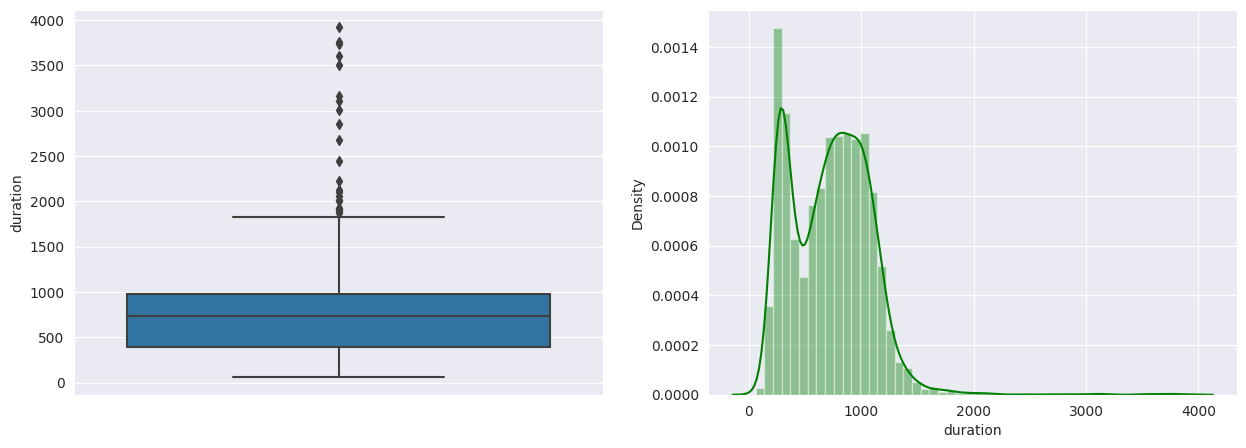

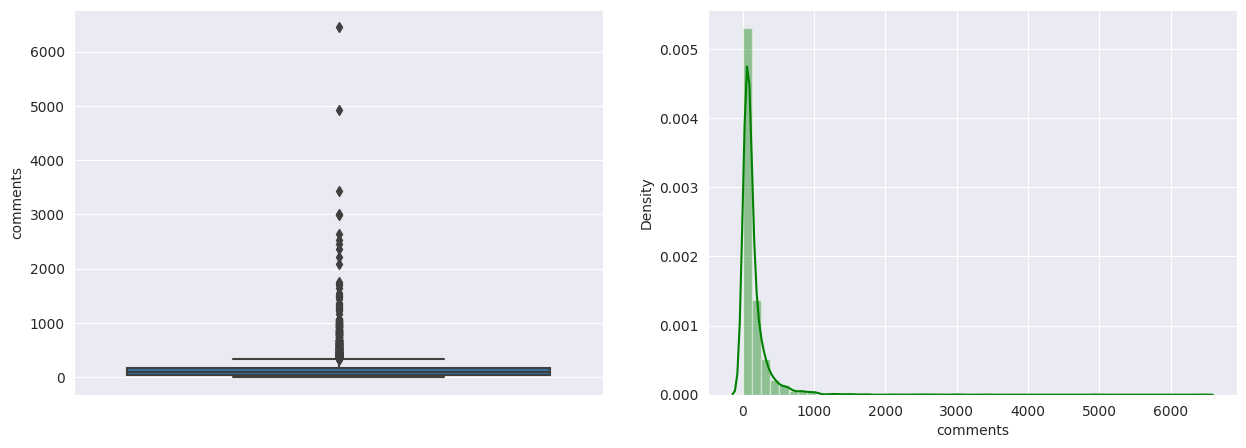

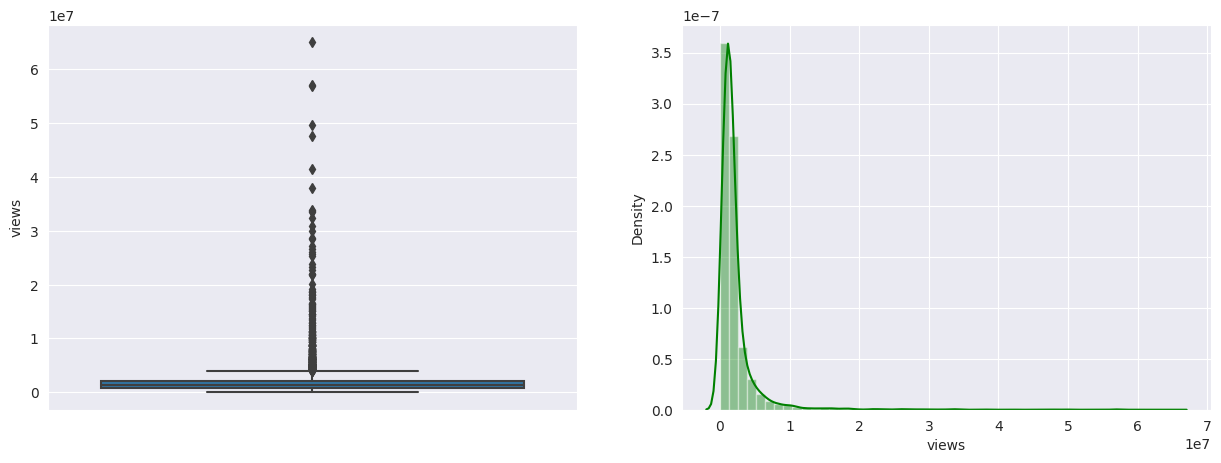

In [137]:
for var in continuous:
    plt.figure(figsize=(15,5))
    plt.subplot(1, 2, 1)
    fig = sns.boxplot(y=TEDtalks_df[var])
    fig.set_title('')
    fig.set_ylabel(var)

    plt.subplot(1, 2, 2)
    fig = sns.distplot(TEDtalks_df[var].dropna(), color='green')
    fig.set_xlabel(var)

    plt.show()

Outliers can be visualised as the dots outside the whiskers in the boxplots. All three continuous variables seem to contain outliers. If we are planning to build linear regression, we should tackle these to improve the model performance.

- As we have less data to work upon, we will not drop the outliers, instead we will use log transformation for `views`, `comments` and capping for `duration`.

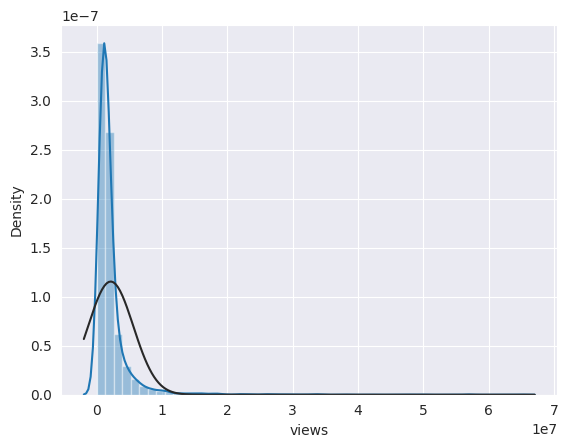

<Figure size 640x480 with 0 Axes>

In [138]:
# Target Variable Transformation
sns.distplot(TEDtalks_df['views'], fit=norm);
fig = plt.figure()

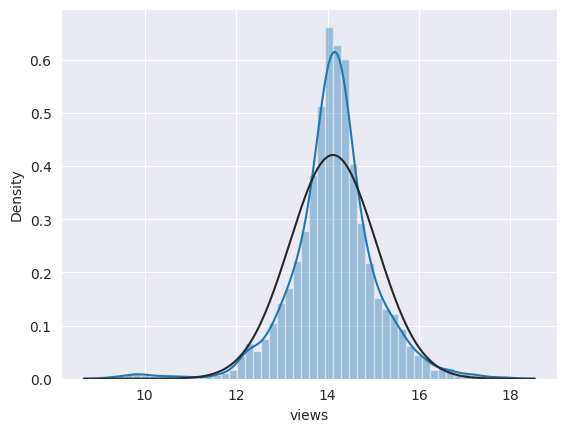

<Figure size 640x480 with 0 Axes>

In [139]:
# It looks more normal now.
sns.distplot((TEDtalks_df['views']).transform(np.log), fit=norm);
fig = plt.figure()

In [140]:
TEDtalks_df ['views_log'] = (TEDtalks_df['views']).transform(np.log)

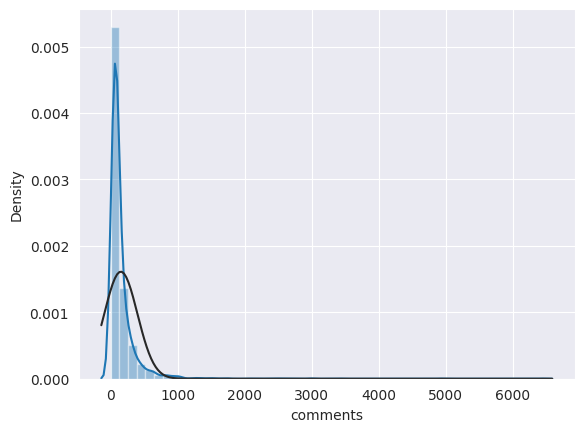

<Figure size 640x480 with 0 Axes>

In [141]:
#comments
sns.distplot(TEDtalks_df['comments'], fit=norm);
fig = plt.figure()

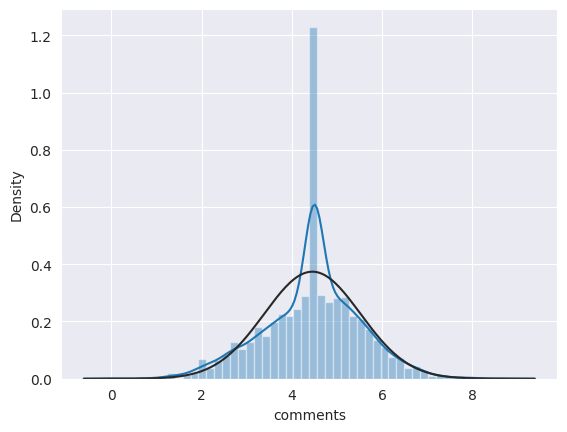

<Figure size 640x480 with 0 Axes>

In [142]:
# It looks more normal now.
sns.distplot((TEDtalks_df['comments']+1).transform(np.log), fit=norm);
fig = plt.figure()

In [143]:
TEDtalks_df ['comments_log'] = (TEDtalks_df['comments']+1).transform(np.log)

In [144]:
#Capping the `duration` with Percentiles
upper_lim = TEDtalks_df['duration'].quantile(.95)
lower_lim = TEDtalks_df['duration'].quantile(.05)
TEDtalks_df.loc[(TEDtalks_df["duration"] > upper_lim),"duration"] = upper_lim
TEDtalks_df.loc[(TEDtalks_df["duration"] < lower_lim),"duration"] = lower_lim

Text(0, 0.5, 'duration')

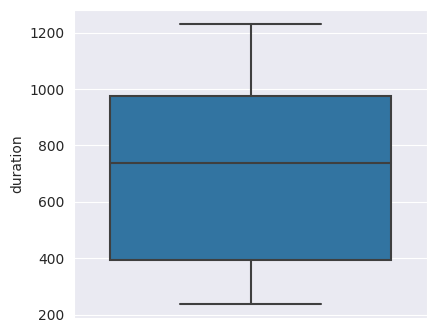

In [145]:
plt.figure(figsize=(10,4))
plt.subplot(1, 2, 1)
fig = sns.boxplot(y=TEDtalks_df["duration"])
fig.set_title('')
fig.set_ylabel("duration")

# **E D A and Feature Engineering**

In [146]:
numerical

['recorded_date', 'published_date', 'duration', 'comments', 'views']

In [147]:
# Let us check for correlation between variables using Pearson's method
selected_columns = ['duration', 'comments', 'views']

# Calculate the correlation matrix
correlation_matrix = TEDtalks_df[selected_columns].corr()

# Print the correlation matrix
print(correlation_matrix)

          duration  comments     views
duration  1.000000  0.206494  0.078365
comments  0.206494  1.000000  0.467657
views     0.078365  0.467657  1.000000


- There is a moderate correlation between views and comments.
- It is justified as more views means more reach and more chnaces of comments.
- Views and duration have very small correlation.
- In general, our data have no issue related to correlation.

### **`title`**

In [148]:
# find popular talk show titles and speakers based on views

fame_talk = TEDtalks_df[['title', 'speaker', 'views', 'occupations']].sort_values('views', ascending=False)[0:10]
fame_talk

,title,speaker,views,occupations
4,Do schools kill creativity?,Sir Ken Robinson,65051954,"{0: ['author', 'educator']}"
1296,Your body language may shape who you are,Amy Cuddy,57074270,{0: ['social psychologist']}
2062,This is what happens when you reply to spam email,James Veitch,56932551,{0: ['comedian and writer']}
646,How great leaders inspire action,Simon Sinek,49730580,{0: ['leadership expert']}
796,The power of vulnerability,Brené Brown,47544833,{0: ['vulnerability researcher']}
1724,How to speak so that people want to listen,Julian Treasure,41504331,{0: ['sound consultant']}
2108,Inside the mind of a master procrastinator,Tim Urban,37976820,{0: ['blogger']}
1366,"Looks aren't everything. Believe me, I'm a model.",Cameron Russell,33874546,{0: ['model']}
2724,My philosophy for a happy life,Sam Berns,33691484,{0: ['activist']}
1898,The next outbreak? We're not ready,Bill Gates,33521780,{0: ['philanthropist']}


**Observations:-**
- The top 3 talks have crossed the magical number of 50 Million views.
- Sir Ken Robinson's talk have topped the list with a very interesting title "Do schools kill creativity?"
- The list also gives and idea that it does not depends upon the occupation of the person. All top 10 people are from different fields.

### **`Speaker`**

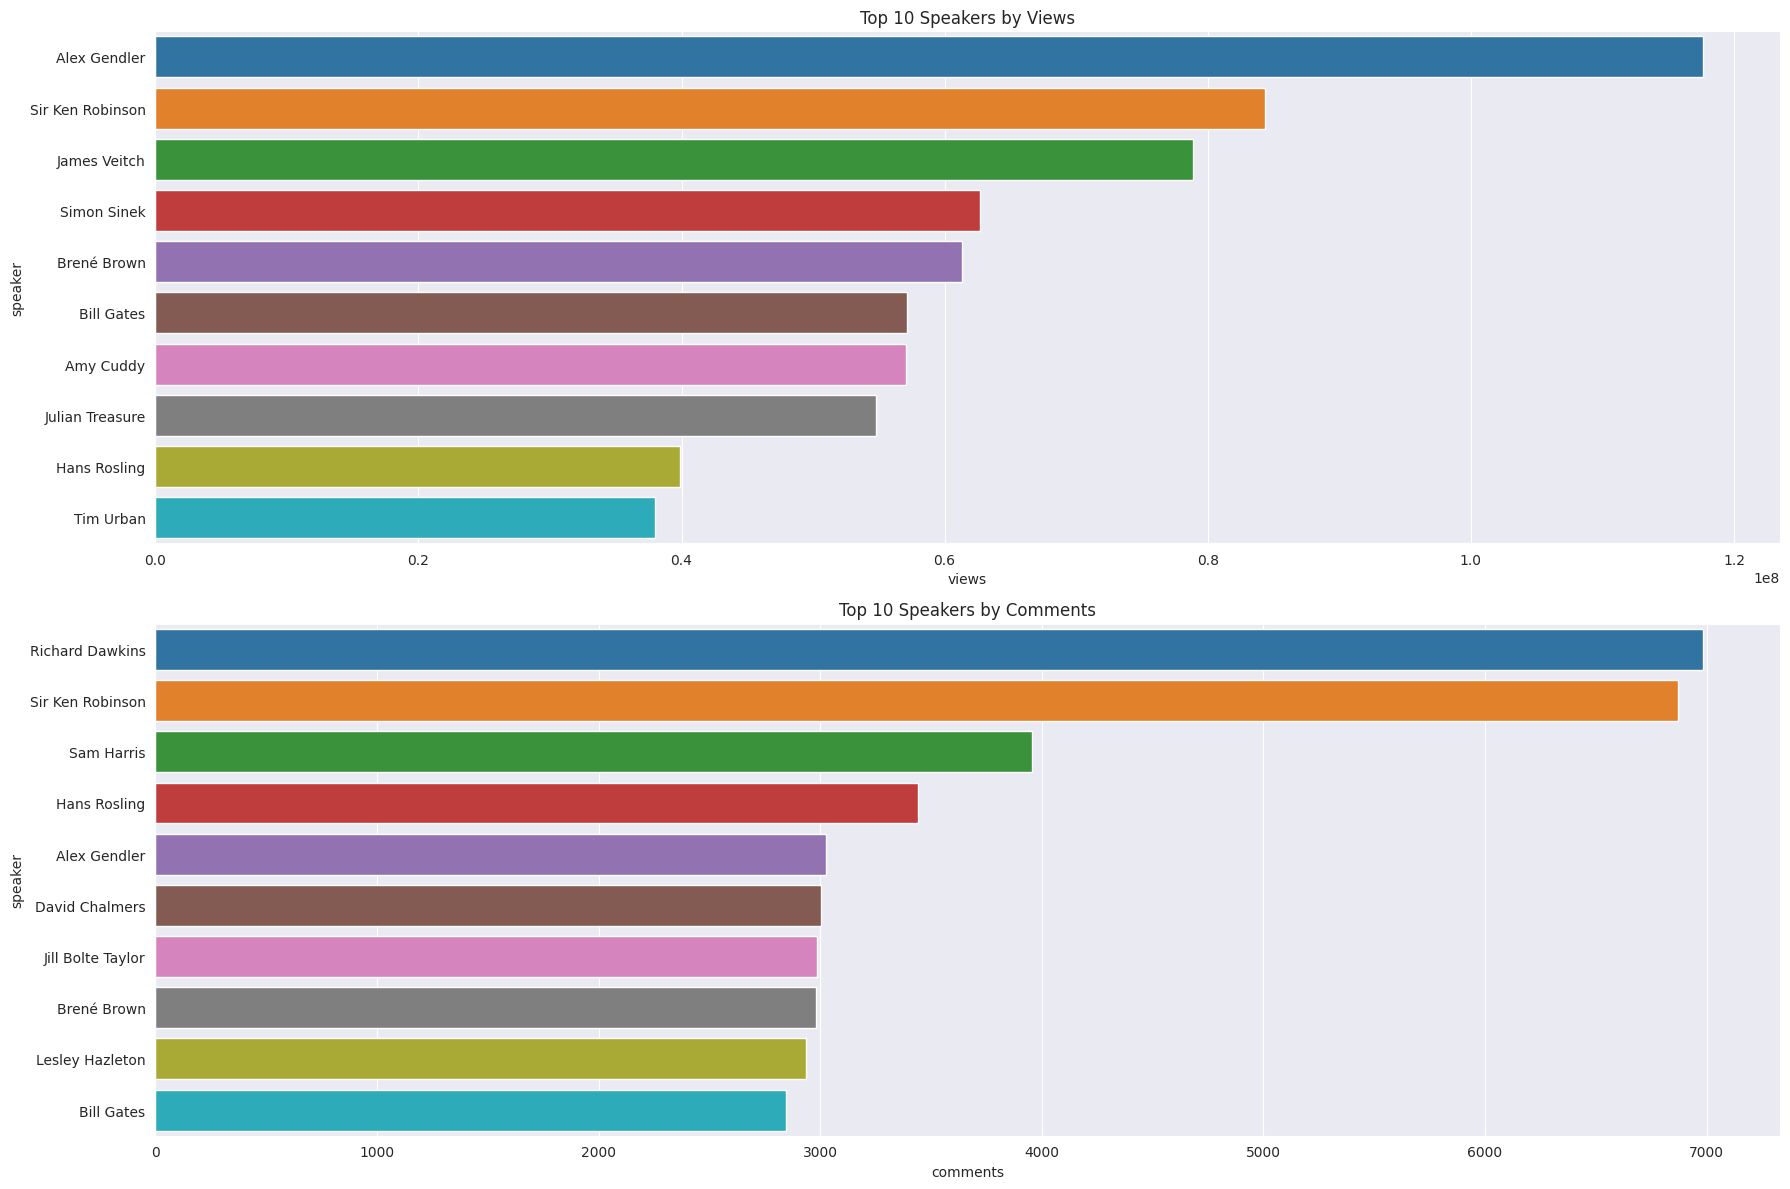

In [149]:
# creating a barplot with top 10 speakers by views & comments
top10_views = TEDtalks_df.groupby('speaker').views.sum().nlargest(10)
top10_views = top10_views.reset_index()

top10_comments = TEDtalks_df.groupby('speaker').comments.sum().nlargest(10)
top10_comments = top10_comments.reset_index()

fig, axs = plt.subplots(2,1, figsize=(18,12))
sns.barplot(x='views', y='speaker', data=top10_views, ax=axs[0])
axs[0].set_title('Top 10 Speakers by Views')

sns.barplot(x='comments', y='speaker', data=top10_comments, ax=axs[1])
axs[1].set_title('Top 10 Speakers by Comments')
plt.tight_layout()
plt.show()

In [150]:
# no. of unique speakers of TED talks
len(TEDtalks_df['speaker'].unique())

3271

### **Observations:-**

- We can observe that there are 5 speakers who are commmon in both the stats, it's means 5 people belong to both, the list of top views as well as comments.

- Also, we can see that toppers of both lists are far away than others in list. They can be also termed as the most viral talks.

In [151]:
# Let us take just an idea of skewness & kurtosis of the numerical columns
TEDtalks_df.skew()

duration       -0.045270
comments        9.653691
views           8.184312
views_log      -0.536922
comments_log   -0.191344
dtype: float64

In [152]:
TEDtalks_df.kurt()

duration         -1.244252
comments        169.024904
views            98.673086
views_log         3.731612
comments_log      0.586418
dtype: float64

- It shows that skewness and kurtosis of `views` and `comments` became modified very well after log transformation.

- Let us have an interesting 3D visualization for three numerical features.

In [153]:
# plot 3D scatter plot of comments, duration and our target column views using plotly library.

fig = px.scatter_3d(TEDtalks_df, x=TEDtalks_df['duration'], y=TEDtalks_df['comments_log'], z=TEDtalks_df['views_log'], color= 'duration')

fig.show()

### **`speaker_popularity`**

In [154]:
# Create a new column 'speaker_popularity' in the main DataFrame and assign the categories

TEDtalks_df['speaker_popularity'] = ""
TEDtalks_df.loc[TEDtalks_df['views'] <= 500000, 'speaker_popularity'] = 'not_popular'
TEDtalks_df.loc[(TEDtalks_df['views'] > 500000) & (TEDtalks_df['views'] <= 1500000), 'speaker_popularity'] = 'avg_popular'
TEDtalks_df.loc[(TEDtalks_df['views'] > 1500000) & (TEDtalks_df['views'] <= 2500000), 'speaker_popularity'] = 'popular'
TEDtalks_df.loc[(TEDtalks_df['views'] > 2500000) & (TEDtalks_df['views'] <= 3500000), 'speaker_popularity'] = 'high_popular'
TEDtalks_df.loc[TEDtalks_df['views'] > 3500000, 'speaker_popularity'] = 'extreme_popular'

# check the dataset
TEDtalks_df.sample(2)

,title,speaker,occupations,recorded_date,published_date,event,native_lang,available_lang,duration,topics,comments,views,views_log,comments_log,speaker_popularity
1499,Our shared condition -- consciousness,John Searle,{0: ['philosopher']},2013-05-08,2013-07-22,TEDxCERN,en,"['ar', 'bg', 'cs', 'da', 'de', 'el', 'en', 'es...",899,"['TEDx', 'brain', 'consciousness', 'philosophy...",635,1467697,14.199205,6.455199,avg_popular
3708,How changing your story can change your life,Lori Gottlieb,"{0: ['psychotherapist', 'author']}",2019-09-12,2019-11-01,TED@DuPont,en,"['ar', 'cs', 'el', 'en', 'es', 'he', 'hu', 'id...",985,"['psychology', 'self', 'writing', 'storytellin...",35,2891503,14.877287,3.583519,high_popular


<Axes: xlabel='speaker_popularity', ylabel='comments'>

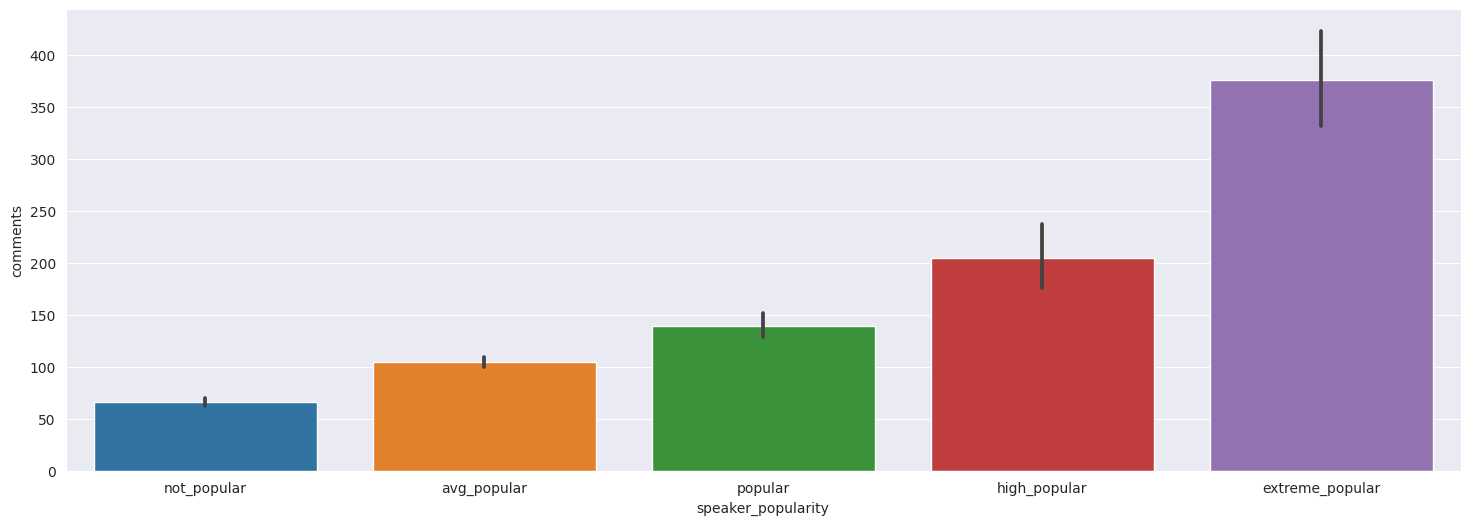

In [155]:
plt.figure(figsize=(18,6))
sns.barplot(data=TEDtalks_df, x='speaker_popularity', y='comments',
            order=['not_popular', 'avg_popular', 'popular', 'high_popular', 'extreme_popular'])


- It's clearly visible that speaker_popularity has a correlation with comments.

- Based on this observation, we can say that the number of views for a TED Talk video is also predictable in certain scenarios.

- To improve the prediction model, we can consider including features such as speaker ratings on TED Talks, similar to how there are rating systems in feedback forms.

### **`video_rating`**

In [156]:
# Create a new column 'video_rating' in the main DataFrame and assign the categories

TEDtalks_df['video_rating'] = ""
TEDtalks_df.loc[TEDtalks_df['comments'] <= 50, 'video_rating'] = 1
TEDtalks_df.loc[(TEDtalks_df['comments'] > 50) & (TEDtalks_df['comments'] <= 120), 'video_rating'] = 2
TEDtalks_df.loc[(TEDtalks_df['comments'] > 120) & (TEDtalks_df['comments'] <= 200), 'video_rating'] = 3
TEDtalks_df.loc[(TEDtalks_df['comments'] > 200) & (TEDtalks_df['comments'] <= 300), 'video_rating'] = 4
TEDtalks_df.loc[TEDtalks_df['comments'] > 300, 'video_rating'] = 5

# check the dataset
TEDtalks_df.sample(2)


,title,speaker,occupations,recorded_date,published_date,event,native_lang,available_lang,duration,topics,comments,views,views_log,comments_log,speaker_popularity,video_rating
2981,"How I climbed a 3,000-foot vertical cliff -- w...",Alex Honnold,{0: ['rock climber']},2018-04-10,2018-10-08,TED2018,en,"['ar', 'en', 'es', 'fa', 'fr', 'he', 'hu', 'it...",709,"['nature', 'adventure', 'exploration', 'storyt...",78,8734144,15.982751,4.369448,extreme_popular,2
1548,Adventures in Twitter fiction,Andrew Fitzgerald,{0: ['editor']},2013-07-15,2013-10-11,TEDSalon NY2013,en,"['ar', 'cs', 'de', 'el', 'en', 'es', 'fa', 'fr...",715,"['culture', 'literature', 'social media', 'sto...",64,1037688,13.852506,4.174387,avg_popular,2


<Axes: xlabel='speaker_popularity', ylabel='video_rating'>

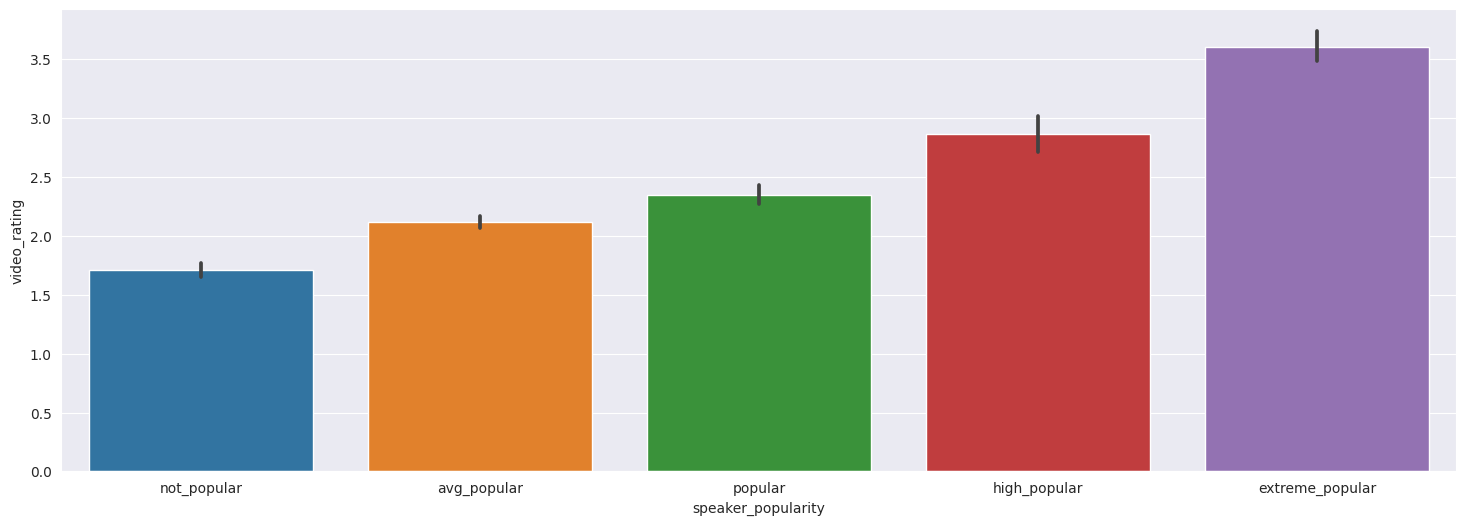

In [157]:
plt.figure(figsize=(18,6))
sns.barplot(data=TEDtalks_df, x='speaker_popularity', y='video_rating',
            order=['not_popular', 'avg_popular', 'popular', 'high_popular', 'extreme_popular'])

- Comments are an indication of the relevance and engagement of audience in the topic of the TED talk.

- As we can observe, we created a new feature 'video_rating' based upon the comments.

- The video_rating is a good indicator of the speaker _popularity too as visible from the above graph, which is ultimately a indicator of views.

### **`native_lang`**

In [158]:
most_popular_lang = TEDtalks_df.groupby('native_lang')['views'].sum().nlargest(10)
print(most_popular_lang)

native_lang
en       8561354683
es         18624686
fr          8843261
it          3466037
ko          2057706
ja          2040853
ar          1452611
zh-cn       1368494
pt-br       1167889
hi          1153704
Name: views, dtype: int64


- It is astonishig to see that English is far beyond other langauges in terms of views, which can be termed as popularity too.

- Spanish is second most popular langauge but have much lower views than English.

- One of the reasons for English having so many views is because most of the speakers have used English for the communnication as English is a global language.

### **`published_date`**

In [159]:
# Making separate column for day, month and year of upload
TEDtalks_df['published_year'] = TEDtalks_df['published_date'].dt.year
TEDtalks_df['published_month'] = TEDtalks_df['published_date'].dt.month
TEDtalks_df['published_day'] = TEDtalks_df["published_date"].dt.day_name()

# storing weekdays in order of numbers from 0 to 6 value
daydict = {'Sunday' : 0, 'Monday' : 1, 'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6}

# making new column holding information of day number
TEDtalks_df['published_daynumber'] = TEDtalks_df['published_day'].map(daydict)

In [160]:
# add one more column published_months_ago
TEDtalks_df['published_months_ago'] = ((2023 - TEDtalks_df['published_year'])*12 + TEDtalks_df['published_month'])
TEDtalks_df.sample(1)

,title,speaker,occupations,recorded_date,published_date,event,native_lang,available_lang,duration,topics,...,views,views_log,comments_log,speaker_popularity,video_rating,published_year,published_month,published_day,published_daynumber,published_months_ago
2194,How to grow a forest in your backyard,Shubhendu Sharma,{0: ['eco-entrepreneur']},2016-05-18,2016-07-14,TED@BCG Paris,en,"['ar', 'bg', 'cs', 'da', 'de', 'en', 'es', 'fa...",551,"['botany', 'cities', 'design', 'ecology', 'eng...",...,2645240,14.788272,4.317488,high_popular,2,2016,7,Thursday,4,91


### **`event`**

In [161]:
# there are a lot of TED events
print(TEDtalks_df['event'].value_counts().head(10))

TED-Ed            555
TED2018            96
TED2017            96
TED2019            91
TED2014            84
TED2009            81
TED2016            75
TED2013            75
TED2015            75
TEDGlobal 2012     70
Name: event, dtype: int64


In [162]:
# add new column of each TED event type using existing column event
ted_categories = ['TED-Ed','TEDx', 'TED', 'TEDGlobal', 'TEDSummit', 'TEDWomen', 'TED Residency']

TEDtalks_df['TEDevent_type'] = TEDtalks_df['event'].map(lambda x: "TEDx" if x[0:4] == "TEDx" else x)
TEDtalks_df['TEDevent_type'] = TEDtalks_df['TEDevent_type'].map(lambda x: "TED-Ed" if x[0:4] == "TED_Ed" else x)
TEDtalks_df['TEDevent_type'] = TEDtalks_df['TEDevent_type'].map(lambda x: "TED" if x[0:4] == "TED2" else x)
TEDtalks_df['TEDevent_type'] = TEDtalks_df['TEDevent_type'].map(lambda x: "TEDGlobal" if x[0:4] == "TEDG" else x)
TEDtalks_df['TEDevent_type'] = TEDtalks_df['TEDevent_type'].map(lambda x: "TEDWomen" if x[0:4] == "TEDW" else x)
TEDtalks_df['TEDevent_type'] = TEDtalks_df['TEDevent_type'].map(lambda x: "TEDSummit" if x[0:4] == "TEDS" else x)
TEDtalks_df['TEDevent_type'] = TEDtalks_df['TEDevent_type'].map(lambda x: "TED Residency" if x[0:4] == "TEDR" else x)
TEDtalks_df['TEDevent_type'] = TEDtalks_df['TEDevent_type'].map(lambda x: "Other TED" if x not in ted_categories else x)


In [163]:
TEDtalks_df.sample(1)

,title,speaker,occupations,recorded_date,published_date,event,native_lang,available_lang,duration,topics,...,views_log,comments_log,speaker_popularity,video_rating,published_year,published_month,published_day,published_daynumber,published_months_ago,TEDevent_type
1978,How to avoid surveillance ... with the phone i...,Christopher Soghoian,{0: ['privacy researcher and activist']},2015-03-17,2015-08-20,TED2015,en,"['ar', 'de', 'el', 'en', 'es', 'fa', 'fr', 'he...",376,"['TED Fellows', 'government', 'security', 'tec...",...,14.632904,4.356709,popular,2,2015,8,Thursday,4,104,TED


In [164]:
# check the all events talkshows counts

pd.DataFrame(TEDtalks_df['TEDevent_type'].value_counts()).reset_index()

,index,TEDevent_type
0,TED,1178
1,TEDx,692
2,Other TED,678
3,TED-Ed,555
4,TEDGlobal,516
5,TEDWomen,194
6,TEDSummit,146
7,TED Residency,40


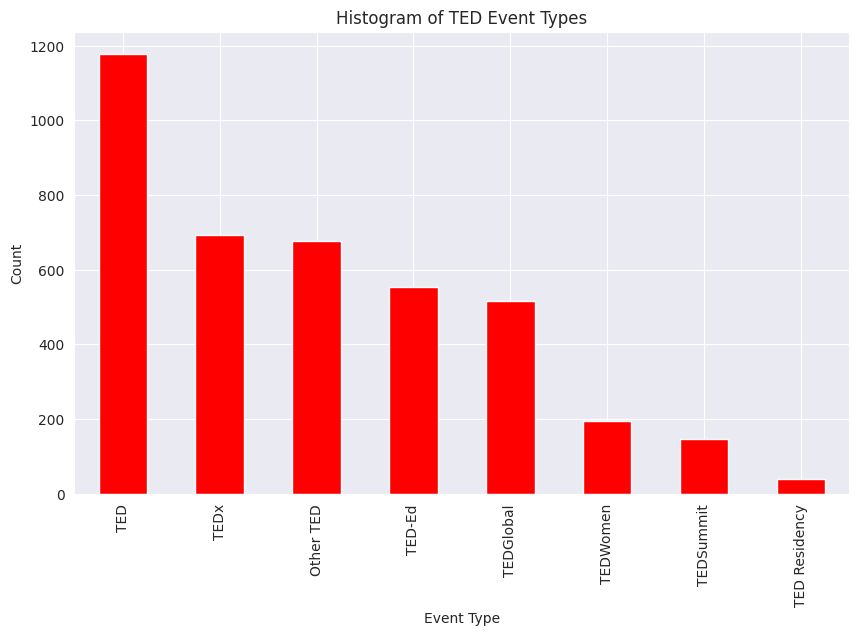

In [165]:
TEDtalks_df['TEDevent_type'].value_counts().plot.bar(figsize=(10, 6), color='red')
plt.xlabel('Event Type')
plt.ylabel('Count')
plt.title('Histogram of TED Event Types')
plt.show()


In [166]:
import ast
# use duplicate dataframe for topics analysis
df = TEDtalks_df.copy()

df['topics'] = df['topics'].apply(lambda x: ast.literal_eval(x))
s = df.apply(lambda x: pd.Series(x['topics']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'topic'

df = df.drop('topics', axis=1).join(s)

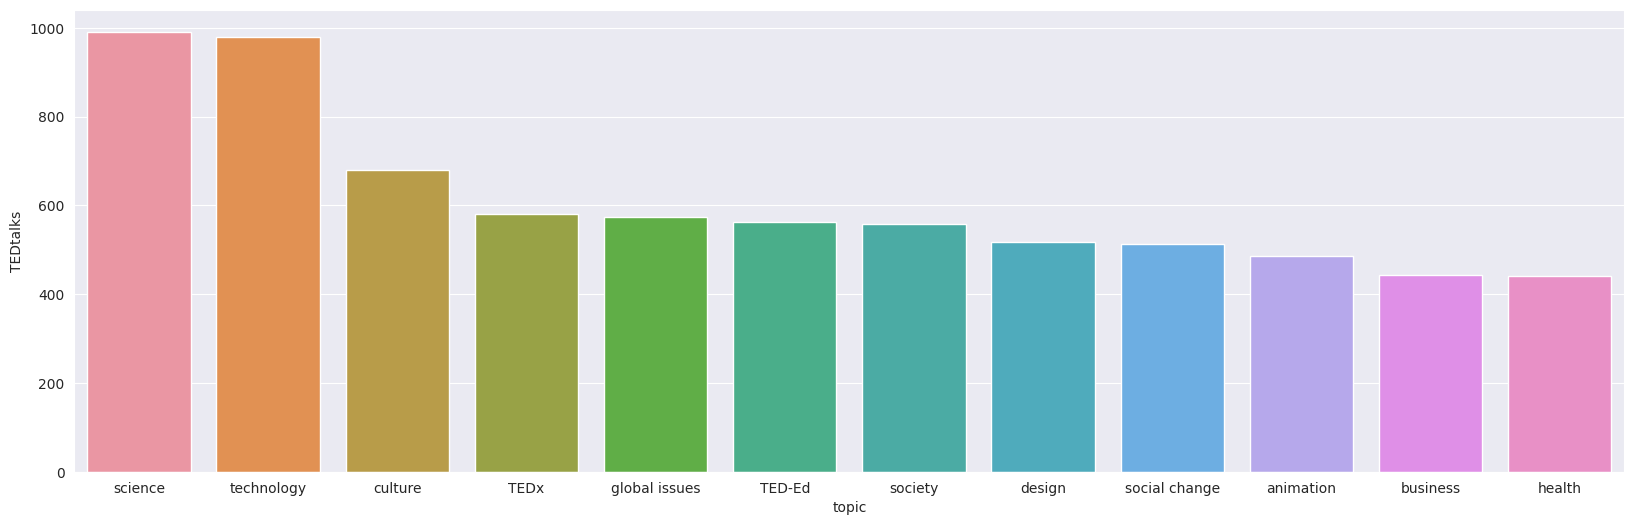

In [167]:
# plot a bar chart of popular topics of TEDx Website

pop_topic = pd.DataFrame(df['topic'].value_counts()).reset_index()
pop_topic.columns = ['topic', 'TEDtalks']

plt.figure(figsize=(20,6))
sns.barplot(x='topic', y='TEDtalks', data=pop_topic.head(12))
plt.show()

- As expected, science and Technology are the very popular topics for talks.

- The next question I want to answer is the trends in the share of topics of TED Talks across the world. Has the demand for Technology talks increased? Do certain years have a disproportionate share of talks related to global issues? Let's find out!

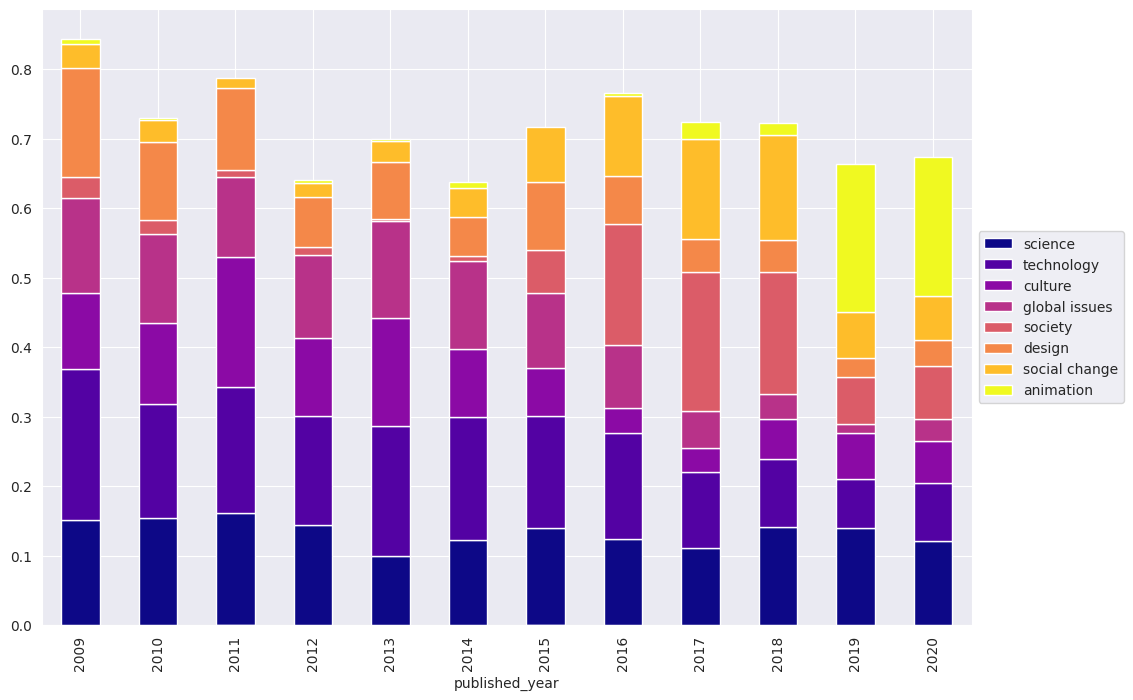

In [168]:
# plot the stacked bar charts of top 8 topics over the year and check trend
pop_theme_talks = df[(df['topic'].isin(pop_topic.head(12)['topic'])) & (df['topic'] != ('TEDx','TED-Ed'))]
pop_theme_talks['published_year'] = pop_theme_talks['published_year'].astype('int')
pop_theme_talks = pop_theme_talks[pop_theme_talks['published_year'] > 2008]

themes = list(pop_topic.head(10)['topic'])
themes.remove('TEDx')
themes.remove('TED-Ed')

ctab = pd.crosstab([pop_theme_talks['published_year']], pop_theme_talks['topic']).apply(lambda x: x/x.sum(), axis=1)
ctab[themes].plot(kind='bar', stacked=True, colormap='plasma', figsize=(12,8)).legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

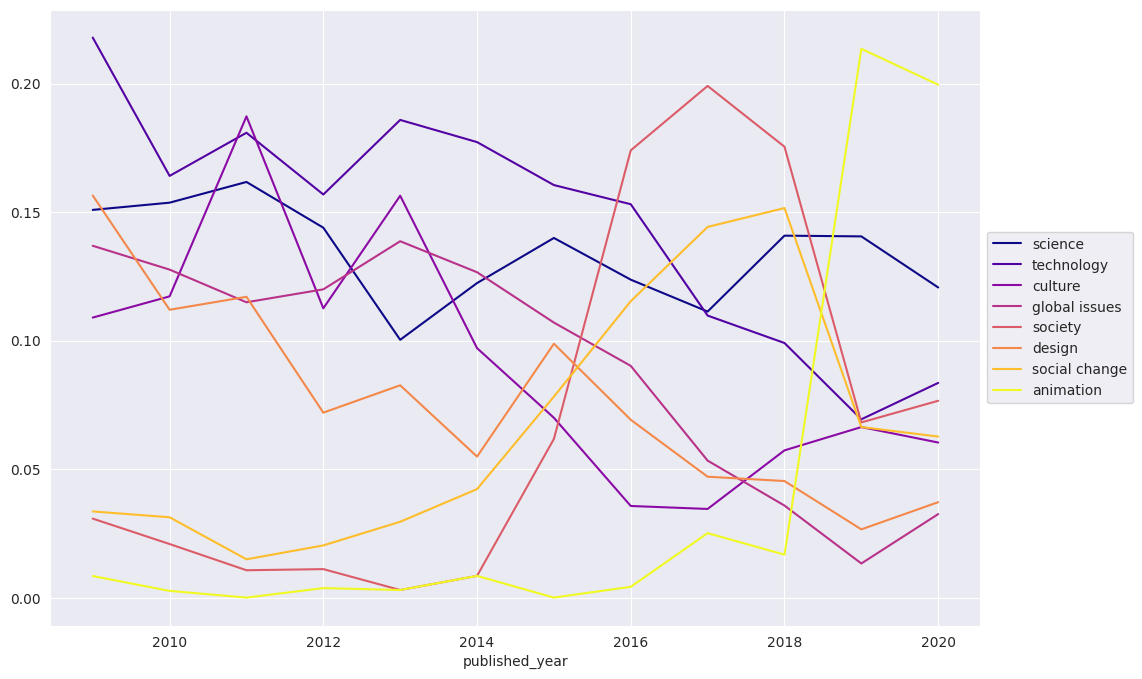

In [169]:
# plot line charts for top 8 topics perform over the year

ctab[themes].plot(kind='line', stacked=False, colormap='plasma', figsize=(12,8)).legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

- The technology talks has steadily decreased over the years but technology is #1 over the years and then after 2018 animation talks take place. This is understandable considering the boom of gaming industries and also boom of technology such as blockchain, deep learning and augmented with reality capturing people's imagination.

## **Feature selection**

In [170]:
TEDtalks_df.columns

Index(['title', 'speaker', 'occupations', 'recorded_date', 'published_date',
       'event', 'native_lang', 'available_lang', 'duration', 'topics',
       'comments', 'views', 'views_log', 'comments_log', 'speaker_popularity',
       'video_rating', 'published_year', 'published_month', 'published_day',
       'published_daynumber', 'published_months_ago', 'TEDevent_type'],
      dtype='object')

In [171]:
TEDtalks_df

,title,speaker,occupations,recorded_date,published_date,event,native_lang,available_lang,duration,topics,...,views_log,comments_log,speaker_popularity,video_rating,published_year,published_month,published_day,published_daynumber,published_months_ago,TEDevent_type
0,Averting the climate crisis,Al Gore,{0: ['climate advocate']},2006-02-25,2006-06-27,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",977,"['alternative energy', 'cars', 'climate change...",...,15.074935,5.609472,extreme_popular,4,2006,6,Tuesday,2,210,TED
1,The best stats you've ever seen,Hans Rosling,{0: ['global health expert; data visionary']},2006-02-22,2006-06-27,TED2006,en,"['ar', 'az', 'bg', 'bn', 'bs', 'cs', 'da', 'de...",1190,"['Africa', 'Asia', 'Google', 'demo', 'economic...",...,16.489775,6.444131,extreme_popular,5,2006,6,Tuesday,2,210,TED
2,Simplicity sells,David Pogue,{0: ['technology columnist']},2006-02-24,2006-06-27,TED2006,en,"['ar', 'bg', 'de', 'el', 'en', 'es', 'fa', 'fr...",1231,"['computers', 'entertainment', 'interface desi...",...,14.468269,4.828314,popular,3,2006,6,Tuesday,2,210,TED
3,Greening the ghetto,Majora Carter,{0: ['activist for environmental justice']},2006-02-26,2006-06-27,TED2006,en,"['ar', 'bg', 'bn', 'ca', 'cs', 'de', 'en', 'es...",1116,"['MacArthur grant', 'activism', 'business', 'c...",...,14.795365,5.393628,high_popular,4,2006,6,Tuesday,2,210,TED
4,Do schools kill creativity?,Sir Ken Robinson,"{0: ['author', 'educator']}",2006-02-25,2006-06-27,TED2006,en,"['af', 'ar', 'az', 'be', 'bg', 'bn', 'ca', 'cs...",1164,"['children', 'creativity', 'culture', 'dance',...",...,17.990697,8.503500,extreme_popular,5,2006,6,Tuesday,2,210,TED
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3999,A global pandemic calls for global solutions,Larry Brilliant,"{0: ['epidemiologist', 'philanthropist'], 1: [...",2020-04-22,2020-04-24,TED2020: The Prequel,en,"['en', 'es', 'it', 'pt-br']",941,"['coronavirus', 'pandemic', 'epidemiology', 'v...",...,13.542348,3.637586,avg_popular,1,2020,4,Friday,5,40,TED
4000,"Crisis support for the world, one text away",Nancy Lublin,{0: ['health activist']},2020-04-22,2020-04-27,TED2020: The Prequel,en,['en'],690,"['activism', 'data', 'technology', 'mental hea...",...,13.128214,1.945910,avg_popular,1,2020,4,Monday,1,40,TED
4001,The dark history of IQ tests,Stefan C Dombrowski,None,2020-04-27,2020-04-27,TED-Ed,en,"['en', 'es', 'my', 'pt-br']",346,"['TED-Ed', 'education', 'history', 'animation'...",...,12.635212,4.499810,not_popular,2,2020,4,Monday,1,40,TED-Ed
4002,"How ""policing for profit"" undermines your rights",Dick M. Carpenter II,{0: ['law researcher']},2019-06-22,2020-04-28,TEDxMileHigh,en,['en'],774,"['society', 'law', 'policy', 'justice system',...",...,13.048532,2.302585,not_popular,1,2020,4,Tuesday,2,40,TEDx


In [172]:
# dropping unneccessary columns
TEDtalks_df.drop(labels = ["speaker", "title", "recorded_date", "published_date", "event", "native_lang", "topics"],axis = 1, inplace = True)

In [173]:
# again change data-types of columns

TEDtalks_df = TEDtalks_df.astype({'comments':'int64', 'views':'int64','video_rating':'int64', 'duration':'int64'})
TEDtalks_df = TEDtalks_df.astype({
    'speaker_popularity': 'category',
    'published_day': 'category',
    'TEDevent_type': 'category'
})

In [174]:
TEDtalks_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3999 entries, 0 to 4003
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   occupations           3999 non-null   object  
 1   available_lang        3999 non-null   object  
 2   duration              3999 non-null   int64   
 3   comments              3999 non-null   int64   
 4   views                 3999 non-null   int64   
 5   views_log             3999 non-null   float64 
 6   comments_log          3999 non-null   float64 
 7   speaker_popularity    3999 non-null   category
 8   video_rating          3999 non-null   int64   
 9   published_year        3999 non-null   int64   
 10  published_month       3999 non-null   int64   
 11  published_day         3999 non-null   category
 12  published_daynumber   3999 non-null   int64   
 13  published_months_ago  3999 non-null   int64   
 14  TEDevent_type         3999 non-null   category
dtypes: c

### **Correlation Map**

<Axes: >

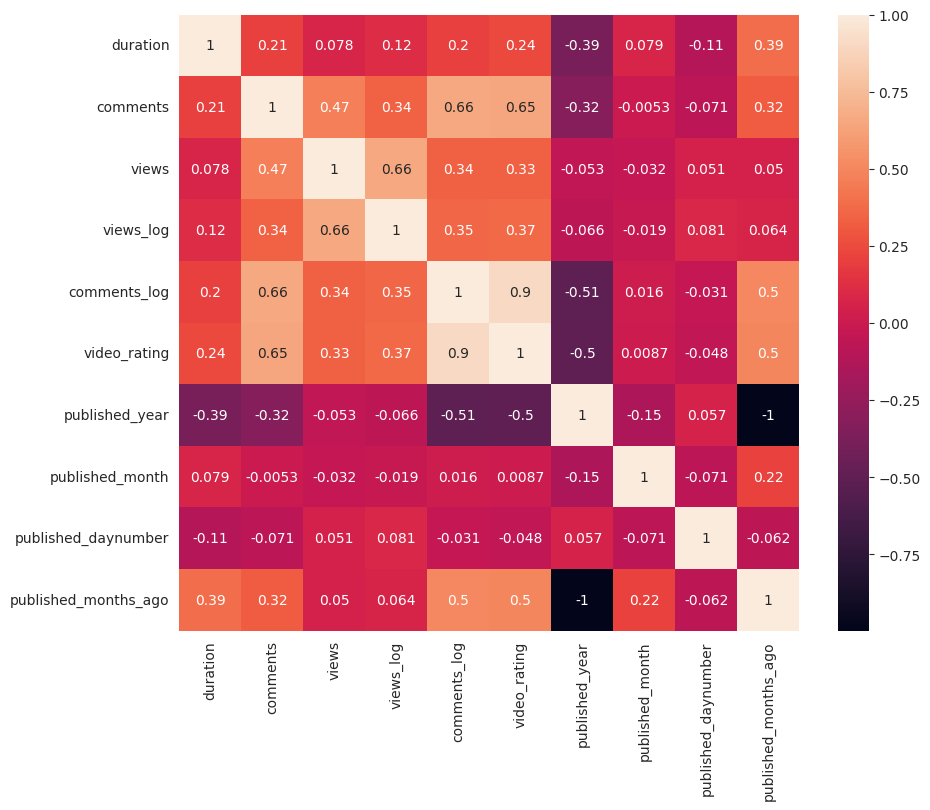

In [175]:
# Plotting correlation  matrix for all features with respect to target variable
correlmap = TEDtalks_df.corr()
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(correlmap, annot=True, ax = ax)

In [176]:
TEDtalks_df.columns

Index(['occupations', 'available_lang', 'duration', 'comments', 'views',
       'views_log', 'comments_log', 'speaker_popularity', 'video_rating',
       'published_year', 'published_month', 'published_day',
       'published_daynumber', 'published_months_ago', 'TEDevent_type'],
      dtype='object')

## **Removing Multicollinearity**

In [177]:
# Create a copy of the dataset
TEDtalks2 = TEDtalks_df.copy()

In [192]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# create a new DataFrame with only numeric columns
numeric_cols = TEDtalks_df.select_dtypes(include=['int64', 'int32', 'float32', 'float64']).drop(['views'], axis=1)

# calculate VIF for each column
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(numeric_cols.values, i) for i in range(numeric_cols.shape[1])]
vif["features"] = numeric_cols.columns

# print the results
vif

,VIF Factor,features
0,6.047484,duration
1,2.288396,comments
2,8.413481,video_rating
3,3.777389,published_month
4,3.544682,published_daynumber
5,9.034811,published_months_ago


In [193]:
# Step 1: drop useless columns

TEDtalks_df.drop(['published_year','comments_log','views_log', 'occupations','available_lang','published_month','published_months_ago','video_rating',], axis=1, inplace=True)


# Step 2: calculate VIF

numeric_cols = TEDtalks_df.select_dtypes(include=['int64', 'int32', 'float32', 'float64']).drop(['views'], axis=1)
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(numeric_cols.values, i) for i in range(numeric_cols.shape[1])]
vif["features"] = numeric_cols.columns


# print the results

vif

KeyError: ignored

In [197]:
# use Yeo - Johnson Transform for views column and then we train test split the data

pt = PowerTransformer()
TEDtalks_df['views'] = pt.fit_transform(pd.DataFrame(TEDtalks_df['views']))

- power transformer is really good option so we apply also on comments, duration, available_languages when we make pipeline using column transformer.

# **model implementation and pre-processing**

## **`Train, Test and Split`**

In [200]:
# split the Dataset into independent(x) and dependent(y) Dataset

X = TEDtalks_df.drop(columns=['views'])
y = TEDtalks_df['views']

In [ ]:
# display independent variables dataframe

X

In [202]:
# display dependent variable dataframe

y

0       1.019656
1       2.707031
2       0.345536
3       0.705672
4       4.702136
          ...   
3999   -0.636330
4000   -1.056957
4001   -1.541821
4002   -1.136498
4003   -3.075383
Name: views, Length: 3999, dtype: float64

In [203]:
# calling train_test_split() to get the training and testing data.

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

# split sizes
print(X_train.shape)
print(X_test.shape)

(3199, 6)
(800, 6)


In [204]:
TEDtalks_df.sample(2)

,duration,comments,views,speaker_popularity,published_day,published_daynumber,TEDevent_type
3818,297,89,0.115914,popular,Thursday,4,TED-Ed
1355,897,833,0.445348,popular,Friday,5,TEDx


In [211]:
TEDtalks_df = TEDtalks_df.astype({'duration':'float64'})

## **Data pre-processing using ColumnTransformer for make Pipeline**


In [216]:
# using column transformer to make step1 of scaling, encoding, function transformer, imputer etc to build pipelines.

step1 = ColumnTransformer(transformers=[
    ('col_tnf', StandardScaler(),[0,1,3,5]),
    ('col_tnf1', PowerTransformer(),[0,1,3]),
    ('col_tnf2', OneHotEncoder(sparse=False, drop='first'),[4,5]),
    ('col_tnf3', OrdinalEncoder(categories=[['not_popular','avg_popular','popular','high_popular','extreme_popular']]),[2])
],remainder='passthrough')
('col_tnf4', OneHotEncoder(sparse=False, drop='first'), [7])  # Add one-hot encoding for 'day' column

# display pipeline

from sklearn import set_config
set_config(display='diagram')

step1 = ColumnTransformer(transformers=[
    ('col_tnf', StandardScaler(), [0, 1, 3, 5]),
    ('col_tnf1', PowerTransformer(), [0, 1, 3]),
    ('col_tnf2', OneHotEncoder(sparse=False, drop='first'), [4, 6]),
    ('col_tnf3', OrdinalEncoder(categories=[['not_popular','avg_popular','popular','high_popular','extreme_popular']]), [2]),

], remainder='passthrough')

By utilizing a ColumnTransformer, we can efficiently apply multiple pre-processing steps, such as scaling, encoding and function transformation, to our data in a single step. This simplifies the pre-processing phase and allows us to build pipelines with different algorithms, performing hyperparameter tuning to find the best results for our model.

---

## **`Linear Regression`**

Linear Regression is a supervised machine learning algorithm where the predicted output is continuous and has a constant slope. It’s used to predict values within a continuous range, rather than trying to classify them into categories.

In [217]:
TEDtalks_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3999 entries, 0 to 4003
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   duration             3999 non-null   float64 
 1   comments             3999 non-null   int64   
 2   views                3999 non-null   float64 
 3   speaker_popularity   3999 non-null   category
 4   published_day        3999 non-null   category
 5   published_daynumber  3999 non-null   int64   
 6   TEDevent_type        3999 non-null   category
dtypes: category(3), float64(2), int64(2)
memory usage: 297.9 KB


In [218]:
# apply LinearRegression algorithm as step2

step2 = LinearRegression()


# make pipeline
pipe1 = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

# fit the pipeline on training dataset
pipe1.fit(X_train,y_train)

# predict the train and test dataset
y_pred_train = pipe1.predict(X_train)
y_pred = pipe1.predict(X_test)

# display pipeline diagram
display(pipe1)

# LinearRegression model all output scores
print('\033[1mTraining data R2 and Adjusted R2 Score\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print('R2 score',r2_score(y_train,y_pred_train))
print('Adjusted R2 score', (1-(1-r2_score(y_train,y_pred_train))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))))

print('\n')
print('\033[1mTesting data R2 and Adjusted R2 Score\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print('R2 score',r2_score(y_test,y_pred))
print('Adjusted R2 score', (1-(1-r2_score(y_test,y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))))

print('\n')
print('\033[1mThe performance metrics\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print('MAE',mean_absolute_error(y_test,y_pred))
print('MSE',mean_squared_error(y_test,y_pred))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred)))

ValueError: ignored

In [ ]:
# Plot the figure
plt.figure(figsize=(20,8))
plt.plot(y_pred)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No. of Test Data')
plt.show()

---

## **`Ridge Regression(L2) with hyperparameter tuning`**

- In Ridge regression, we add a penalty term which is equal to the square of the coefficient. The L2 term is equal to the square of the magnitude of the coefficients. We also add a coefficient lambda to control that penalty term. In this case if lambda is zero then the equation is the basic OLS else if lambda > 0 then it will add a constraint to the coefficient. As we increase the value of lambda(Alpha) this constraint causes the value of the coefficient to tend towards zero but not exectly Zero. This leads to tradeoff of higher bias (dependencies on certain coefficients tend to be 0 and on certain coefficients tend to be very large, making the model less flexible) for lower variance.

**Limitation of Ridge Regression :-**
- Ridge regression decreases the complexity of a model but does not reduce the number of variables since it never leads to a coefficient been zero rather only minimizes it. Hence, this model is not good for feature reduction or feature selection.

In [207]:
# apply RidgeRegression algorithm with hyperparameter tuning as step2


# giving parameters
parameters = {'alpha': [1e-8,1e-7,1e-6,1e-5,1e-4,1e-3,1e-2,1e-1,1,3,5,8,12,15,18,21,25]}

# we use gridsearchCV because the dataset is not that big so we use this not RandomizedSearchCV
Reg_ridge = GridSearchCV(Ridge(), parameters, cv=10)

step2 = Reg_ridge

# make pipeline
pipe2 = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

# fit the pipeline on training dataset
pipe2.fit(X_train,y_train)

# predict the train and test dataset
y_pred_train = pipe2.predict(X_train)
y_pred = pipe2.predict(X_test)

# display pipeline diagram
display(pipe2)

# Ridge Regression model all output scores
print('\033[1mTraining data R2 and Adjusted R2 Score\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print('R2 score',r2_score(y_train,y_pred_train))
print('Adjusted R2 score', (1-(1-r2_score(y_train,y_pred_train))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))))

print('\n')
print('\033[1mTesting data R2 and Adjusted R2 Score\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print('R2 score',r2_score(y_test,y_pred))
print('Adjusted R2 score', (1-(1-r2_score(y_test,y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))))

print('\n')
print('\033[1mCross-validation score and best params\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print("The best parameters is", Reg_ridge.best_params_)
print('cross-validation score', Reg_ridge.best_score_)

print('\n')
print('\033[1mThe performance metrics\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print('MAE',mean_absolute_error(y_test,y_pred))
print('MSE',mean_squared_error(y_test,y_pred))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred)))

ValueError: ignored

In [ ]:
# Plot the figure
plt.figure(figsize=(20,8))
plt.plot(y_pred)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No. of Test Data')
plt.show()

---

## **`Lasso Regression(L1) with hyperparameter tuning`**

- Lasso regression stands for Least Absolute Shrinkage and Selection Operator. It adds penalty term to the cost function. This term is the absolute sum of the coefficients. As the value of coefficients increases from 0 this term penalizes, cause model, to decrease the value of coefficients in order to reduce loss. The difference between ridge and lasso regression is that it tends to make coefficients to absolute zero as compared to Ridge which never sets the value of coefficient to absolute zero which means that Lasso regression can perform feature selection by eliminating features that have little or no effect on the target variable.

**Limitation of Lasso Regression :-**
- When the number of predictors is greater than the number of observations (p>n), Lasso may have difficulty in selecting relevant predictors. In such cases, Lasso may shrink some important predictors to zero or select some predictors randomly. This problem is known as the "Lasso Pathology" problem.

- Also, when there are highly correlated variables in the dataset, Lasso tends to select only one variable among them and ignore the others, which may result in losing important information. This issue is called the "Grouping Effect" or "Variable Selection Instability" problem.

In [ ]:
# apply LassoRegression algorithm with hyperparameter tuning as step2


# giving parameters
parameters = {'alpha': [1e-8,1e-7,1e-6,1e-5,1e-4,1e-3,1e-2,1e-1,1,2,3,4,5,8,12,15,18,21,25]}

# we use gridsearchCV because the dataset is not that big so we use this not RandomizedSearchCV
Reg_Lasso = GridSearchCV(Lasso(), parameters, cv=10)

step2 = Reg_Lasso

# make pipeline
pipe3 = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

# fit the pipeline on training dataset
pipe3.fit(X_train,y_train)

# predict the train and test dataset
y_pred_train = pipe3.predict(X_train)
y_pred = pipe3.predict(X_test)

# display pipeline diagram
display(pipe3)

# Lasso Regression model all output scores
print('\033[1mTraining data R2 and Adjusted R2 Score\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print('R2 score',r2_score(y_train,y_pred_train))
print('Adjusted R2 score', (1-(1-r2_score(y_train,y_pred_train))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))))

print('\n')
print('\033[1mTesting data R2 and Adjusted R2 Score\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print('R2 score',r2_score(y_test,y_pred))
print('Adjusted R2 score', (1-(1-r2_score(y_test,y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))))

print('\n')
print('\033[1mCross-validation score and best params\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print("The best parameters is", Reg_Lasso.best_params_)
print('cross-validation score', Reg_Lasso.best_score_)

print('\n')
print('\033[1mThe performance metrics\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print('MAE',mean_absolute_error(y_test,y_pred))
print('MSE',mean_squared_error(y_test,y_pred))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred)))

In [ ]:
# Plot the figure
plt.figure(figsize=(20,8))
plt.plot(y_pred)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No. of Test Data')
plt.show()

---

## **`DecisionTreeRegressor with Hyperparameter tuning`**

- Decision trees can be used for classification as well as regression problems. The name itself suggests that it uses a flowchart like a tree structure to show the predictions that result from a series of feature-based splits. It starts with a root node and ends with a decision made by leaves.

- Decision trees are upside down which means the root is at the top and then this root is split into various several Decision nodes. Decision trees are nothing but a bunch of if-else statements in layman terms. It checks if the condition is true and if it is then it goes to the next node attached to that decision.


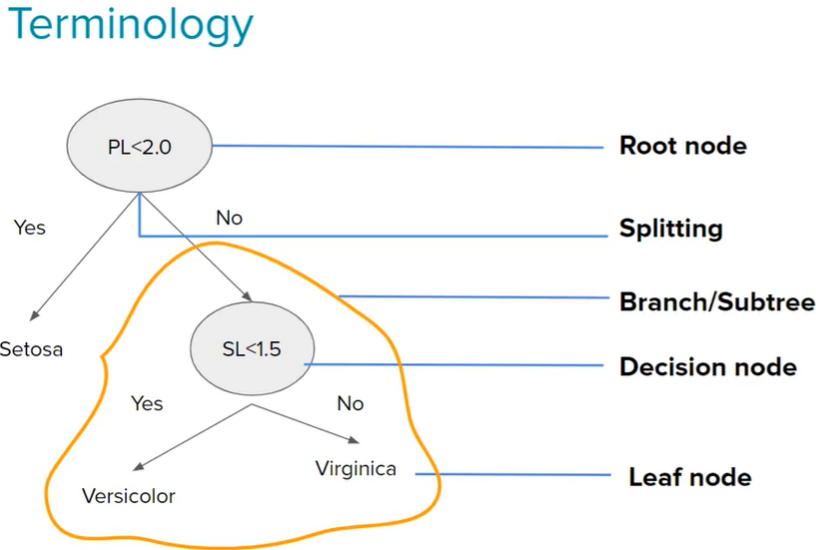

In [ ]:
# apply DecisionTreeRegressor algorithm with hyperparameter tuning as step2


# giving parameters
parameters = {
    'criterion':['squared_error'],     # 'friedman_mse', 'absolute_error'
    'splitter' :['best'],              # random
    'max_depth' :[6],                  #4,5,6,7,8,9,None
    'max_features' :[1.0]              #0.25,0.50,0.75,0.85
}

# we use gridsearchCV because the dataset is not that big so we use this not RandomizedSearchCV
dtr = GridSearchCV(DecisionTreeRegressor(), param_grid=parameters , cv=10, n_jobs=-1)

step2 = dtr

# make pipeline
pipe4 = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

# fit the pipeline on training dataset
pipe4.fit(X_train,y_train)

# predict the train and test dataset
y_pred_train = pipe4.predict(X_train)
y_pred = pipe4.predict(X_test)

# display pipeline diagram
display(pipe4)

# DecisionTreeRegressor model all output scores
print('\033[1mTraining data R2 and Adjusted R2 Score\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print('R2 score',r2_score(y_train,y_pred_train))
print('Adjusted R2 score', (1-(1-r2_score(y_train,y_pred_train))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))))

print('\n')
print('\033[1mTesting data R2 and Adjusted R2 Score\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print('R2 score',r2_score(y_test,y_pred))
print('Adjusted R2 score', (1-(1-r2_score(y_test,y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))))

print('\n')
print('\033[1mCross-validation score and best params\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print("The best parameters is", dtr.best_params_)
print('cross-validation score', dtr.best_score_)

print('\n')
print('\033[1mThe performance metrics\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print('MAE',mean_absolute_error(y_test,y_pred))
print('MSE',mean_squared_error(y_test,y_pred))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred)))

In [ ]:
# Plot the figure
plt.figure(figsize=(20,8))
plt.plot(y_pred)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No. of Test Data')
plt.show()

---

## **`RandomForestRegressor with hyperparameter tuning`**

- Random Forest is a technique that uses ensemble learning, that combines many weak classifiers to provide solutions to complex problems.

- As the name suggests random forest consists of many decision trees. Rather than depending on one tree it takes the prediction from each tree and based on the majority votes of predictions, predicts the final output.

- Random forests use the bagging method. It creates a subset of the original dataset, and the final output is based on majority ranking and hence the problem of overfitting is taken care of.

In [ ]:
# apply RandomForestRegressor algorithm with hyperparameter tuning as step2


# giving parameters
parameters = {
    'n_estimators':[58],      # 50,55,60,70,80,90,100
    'max_depth' :[6],         # 4,5,6,7,8,9,None
    'max_features' :[None],   # 'sqrt','log2'
    'max_samples' :[0.85]     # 0.40,0.50,0.60,0.70,0.75,0.85,1.0
}

# we use gridsearchCV because the dataset is not that big so we use this not RandomizedSearchCV
rfr = GridSearchCV(RandomForestRegressor(), param_grid=parameters , cv=10, n_jobs=-1)

step2 = rfr

# make pipeline
pipe5 = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

# fit the pipeline on training dataset
pipe5.fit(X_train,y_train)

# predict the train and test dataset
y_pred_train = pipe5.predict(X_train)
y_pred = pipe5.predict(X_test)

# display pipeline diagram
display(pipe5)

# RandomForestRegressor model all output scores
print('\033[1mTraining data R2 and Adjusted R2 Score\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print('R2 score',r2_score(y_train,y_pred_train))
print('Adjusted R2 score', (1-(1-r2_score(y_train,y_pred_train))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))))

print('\n')
print('\033[1mTesting data R2 and Adjusted R2 Score\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print('R2 score',r2_score(y_test,y_pred))
print('Adjusted R2 score', (1-(1-r2_score(y_test,y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))))

print('\n')
print('\033[1mCross-validation score and best params\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print("The best parameters is", rfr.best_params_)
print('cross-validation score', rfr.best_score_)

print('\n')
print('\033[1mThe performance metrics\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print('MAE',mean_absolute_error(y_test,y_pred))
print('MSE',mean_squared_error(y_test,y_pred))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred)))

In [ ]:
# Plot the figure
plt.figure(figsize=(20,8))
plt.plot(y_pred)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No. of Test Data')
plt.show()

## **`AdaBoostRegressor with hyperparameter tuning`**

- Adaboost (Adaptive Boosting) is a type of ensemble learning method used for classification and regression tasks. It works by combining several weak learners (simple models with a slightly better performance than random guessing) to create a strong learner.

- In Adaboost, the algorithm learns Sequential and iteratively by adjusting the weights of the instances in the dataset. During each iteration, the algorithm assigns higher weights to instances that were misclassified by the previous weak learner. Then, the algorithm trains a new weak learner on the updated dataset with the weighted instances. This process is repeated until a predefined number of iterations is reached or until the training error is minimized.

- Once all weak learners are trained, the final prediction is made by combining the predictions of each weak learner. The final prediction is a weighted sum of the individual predictions, where the weight of each weak learner depends on its accuracy.

In [ ]:
# apply AdaBoostRegressor algorithm with hyperparameter tuning as step2


# giving parameters
parameters = {
    'n_estimators' :[200],                         # 50,80,120,160,180,200,220,240
    'learning_rate' :[0.01],                       # 0.0001,0.001,0.01,0.1,1
    'loss' :['linear']                             # 'linear', 'square', 'exponential'
}

# we use gridsearchCV because the dataset is not that big so we use this not RandomizedSearchCV
abr = GridSearchCV(AdaBoostRegressor(), param_grid=parameters , cv=10, n_jobs=-1)

step2 = abr

# make pipeline
pipe6 = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

# fit the pipeline on training dataset
pipe6.fit(X_train,y_train)

# predict the train and test dataset
y_pred_train = pipe6.predict(X_train)
y_pred = pipe6.predict(X_test)

# display pipeline diagram
display(pipe6)

# AdaBoostRegressor model all output scores
print('\033[1mTraining data R2 and Adjusted R2 Score\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print('R2 score',r2_score(y_train,y_pred_train))
print('Adjusted R2 score', (1-(1-r2_score(y_train,y_pred_train))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))))

print('\n')
print('\033[1mTesting data R2 and Adjusted R2 Score\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print('R2 score',r2_score(y_test,y_pred))
print('Adjusted R2 score', (1-(1-r2_score(y_test,y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))))

print('\n')
print('\033[1mCross-validation score and best params\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print("The best parameters is", abr.best_params_)
print('cross-validation score', abr.best_score_)

print('\n')
print('\033[1mThe performance metrics\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print('MAE',mean_absolute_error(y_test,y_pred))
print('MSE',mean_squared_error(y_test,y_pred))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred)))

In [ ]:
# Plot the figure
plt.figure(figsize=(20,8))
plt.plot(y_pred)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No. of Test Data')
plt.show()

## **`GradientBoostingRegressor with hyperparameter tuning`**

- Gradient Boosting is a machine learning algorithm that is widely used for both regression and classification problems. It is an ensemble learning algorithm that combines multiple weak models to create a strong model. Gradient Boosting works by fitting a sequence of weak models to the residuals of the previous model. The weak models are typically decision trees.

- The algorithm starts by fitting a simple model to the data, such as a decision tree with a small number of levels. The next model is then fit to the residual errors of the first model. This process is repeated, with each new model being fit to the residuals of the previous model, until the residuals cannot be improved further or a maximum number of iterations is reached.

- Gradient Boosting differs from other ensemble learning methods, such as Random Forest, in that it does not rely on randomization to create diversity among the models. Instead, it relies on optimizing the loss function directly by updating the model parameters in the direction of the negative gradient of the loss function. This means that each new model is fit to the errors of the previous model, rather than the data directly.

In [ ]:
# apply GradientBoostingRegressor algorithm with hyperparameter tuning as step2


# giving parameters
parameters = {
    'n_estimators' :[160],                                                        # 60,100,140,160,180,200,220
    'learning_rate' :[0.05],                                                      # 0.001,0.01,0.05,0.1,1.0
    'max_depth' :[7],                                                             # 4,5,6,7,8
    'max_leaf_nodes' :[8]                                                         # 4,6,8,12,16,20,24,32,None
    #'loss' :['squared_error']                                                    # 'squared_error', 'absolute_error', 'huber'
}

# we use gridsearchCV because the dataset is not that big so we use this not RandomizedSearchCV
gbr = GridSearchCV(GradientBoostingRegressor(), param_grid=parameters , cv=10, n_jobs=-1)

step2 = gbr


# make pipeline
pipe7 = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

# fit the pipeline on training dataset
pipe7.fit(X_train,y_train)

# predict the train and test dataset
y_pred_train = pipe7.predict(X_train)
y_pred = pipe7.predict(X_test)

# display pipeline diagram
display(pipe7)

# GradientBoostingRegressor model all output scores
print('\033[1mTraining data R2 and Adjusted R2 Score\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print('R2 score',r2_score(y_train,y_pred_train))
print('Adjusted R2 score', (1-(1-r2_score(y_train,y_pred_train))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))))

print('\n')
print('\033[1mTesting data R2 and Adjusted R2 Score\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print('R2 score',r2_score(y_test,y_pred))
print('Adjusted R2 score', (1-(1-r2_score(y_test,y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))))

print('\n')
print('\033[1mCross-validation score and best params\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print("The best parameters is", gbr.best_params_)
print('cross-validation score', gbr.best_score_)

print('\n')
print('\033[1mThe performance metrics\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print('MAE',mean_absolute_error(y_test,y_pred))
print('MSE',mean_squared_error(y_test,y_pred))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred)))

In [ ]:
# Plot the figure
plt.figure(figsize=(20,8))
plt.plot(y_pred)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No. of Test Data')
plt.show()

## **`XGBRegressor with hyperparameter tuning`**

- XGBoost (Extreme Gradient Boosting) is a popular machine learning algorithm used for both regression and classification problems. XGBoost works by iteratively adding decision trees to the model while focusing on the misclassified instances from the previous iterations. During each iteration, XGBoost adjusts the weights of the instances that were misclassified in the previous iteration to make them more important in the next iteration. This approach allows XGBoost to correct its previous mistakes and improve the accuracy of its predictions with each iteration.

- One of the unique features of XGBoost is its regularization techniques, which help to prevent overfitting. XGBoost allows users to tune the model parameters such as the learning rate, maximum depth of the tree, and number of trees in the ensemble to achieve the best performance. Additionally, XGBoost provides a built-in cross-validation framework that enables users to evaluate the performance of the model and tune the hyperparameters.

In [ ]:
# apply XGBRegressor algorithm with hyperparameter tuning as step2


# giving parameters
parameters = {
    'n_estimators' :[170],                                                    # 150,160,170,180,200
    'learning_rate' :[0.05],                                                  # 0.001,0.005,0.01,0.05,0.1
    'max_depth' :[4]                                                          # 3,4,5,6,7,8
}

# we use gridsearchCV because the dataset is not that big so we use this not RandomizedSearchCV
xgbr = GridSearchCV(XGBRegressor(objective='reg:squarederror'), param_grid=parameters , cv=10, n_jobs=-1)

step2 = xgbr

# make pipeline
pipe8 = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

# fit the pipeline on training dataset
pipe8.fit(X_train,y_train)

# predict the train and test dataset
y_pred_train = pipe8.predict(X_train)
y_pred = pipe8.predict(X_test)

# display pipeline diagram
display(pipe8)

# GradientBoostingRegressor model all output scores
print('\033[1mTraining data R2 and Adjusted R2 Score\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print('R2 score',r2_score(y_train,y_pred_train))
print('Adjusted R2 score', (1-(1-r2_score(y_train,y_pred_train))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))))

print('\n')
print('\033[1mTesting data R2 and Adjusted R2 Score\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print('R2 score',r2_score(y_test,y_pred))
print('Adjusted R2 score', (1-(1-r2_score(y_test,y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))))

print('\n')
print('\033[1mCross-validation score and best params\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print("The best parameters is", xgbr.best_params_)
print('cross-validation score', xgbr.best_score_)

print('\n')
print('\033[1mThe performance metrics\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print('MAE',mean_absolute_error(y_test,y_pred))
print('MSE',mean_squared_error(y_test,y_pred))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred)))

In [ ]:
# Plot the figure
plt.figure(figsize=(20,8))
plt.plot(y_pred)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No. of Test Data')
plt.show()

## **`VotingRegressor`**

In [ ]:
# apply VotingRegressor algorithm with hyperparameter tuning as step2

from sklearn.ensemble import VotingRegressor

lr = LinearRegression()
rf = RandomForestRegressor(n_estimators=58,random_state=0,max_samples=0.85,bootstrap=True,max_features=None,max_depth=6)
xgb = XGBRegressor(objective='reg:squarederror',n_estimators=170,learning_rate=0.05,max_depth=4)

estimators = [('lr', lr), ('rf', rf), ('xgb',xgb)]

param_grid = {
    'weights': [[1,3,2]]
}

# we use gridsearchCV because the dataset is not that big so we use this not RandomizedSearchCV
vr = GridSearchCV(VotingRegressor(estimators),param_grid=param_grid, cv=10, n_jobs=-1)


step2 = vr

# make pipeline
pipe9 = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

# fit the pipeline on training dataset
pipe9.fit(X_train,y_train)

# predict the train and test dataset
y_pred_train = pipe9.predict(X_train)
y_pred = pipe9.predict(X_test)

# display pipeline diagram
display(pipe9)

# VotingRegressor model all output scores
print('\033[1mTraining data R2 and Adjusted R2 Score\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print('R2 score',r2_score(y_train,y_pred_train))
print('Adjusted R2 score', (1-(1-r2_score(y_train,y_pred_train))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))))

print('\n')
print('\033[1mTesting data R2 and Adjusted R2 Score\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print('R2 score',r2_score(y_test,y_pred))
print('Adjusted R2 score', (1-(1-r2_score(y_test,y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))))

print('\n')
print('\033[1mCross-validation score and best params\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print("The best parameters is", vr.best_params_)
print('cross-validation score', vr.best_score_)

print('\n')
print('\033[1mThe performance metrics\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print('MAE',mean_absolute_error(y_test,y_pred))
print('MSE',mean_squared_error(y_test,y_pred))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred)))

In [ ]:
# Plot the figure
plt.figure(figsize=(20,8))
plt.plot(y_pred)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No. of Test Data')
plt.show()

### **observations :-**

- After performing hyperparameter tuning on different regression models, we found that the voting regressor model slightly outperformed the random forest regressor, although the difference was not significant. Both models showed strong performance and were very close in terms of their predictive accuracy.

## **`StackingRegressor`**

In [ ]:
# apply StackingRegressor algorithm as step2


from sklearn.ensemble import StackingRegressor

lr = LinearRegression()
rf = RandomForestRegressor(n_estimators=58,random_state=0,max_samples=0.85,bootstrap=True,max_features=None,max_depth=6)
xgb = XGBRegressor(objective='reg:squarederror',n_estimators=170,learning_rate=0.05,max_depth=4)

estimators = [('lr', lr), ('rf', rf), ('xgb',xgb)]

step2 = StackingRegressor(estimators=estimators, final_estimator=Ridge(alpha=0.01),cv=10)

# make pipeline
pipe10 = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

# fit the pipeline on training dataset
pipe10.fit(X_train,y_train)

# predict the train and test dataset
y_pred_train = pipe10.predict(X_train)
y_pred = pipe10.predict(X_test)

# display pipeline diagram
display(pipe10)

# StackingRegressor model all output scores
print('\033[1mTraining data R2 and Adjusted R2 Score\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print('R2 score',r2_score(y_train,y_pred_train))
print('Adjusted R2 score', (1-(1-r2_score(y_train,y_pred_train))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))))

print('\n')
print('\033[1mTesting data R2 and Adjusted R2 Score\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print('R2 score',r2_score(y_test,y_pred))
print('Adjusted R2 score', (1-(1-r2_score(y_test,y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))))

# print('\n')
# print('\033[1mCross-validation score and best params\033[0m')
# print('\033[1m' + '-----------------------------------------' + '\033[0m')
# print("The best parameters is", xgbr.best_params_)
# print('cross-validation score', xgbr.best_score_)

print('\n')
print('\033[1mThe performance metrics\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print('MAE',mean_absolute_error(y_test,y_pred))
print('MSE',mean_squared_error(y_test,y_pred))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred)))

In [ ]:
# Plot the figure
plt.figure(figsize=(20,8))
plt.plot(y_pred)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No. of Test Data')
plt.show()

#**Conclusion :-**


- After evaluating multiple regression models on the dataset, Random Forest Regressor perform better than other models. They have higher R2 scores, lower error metrics, and can generalize well on unseen data.

- Linear Regressor and Lasso Regressor have slightly lower performance metrics compared to Random Forest Regressor and Gradient Boosting Regressor.

- Decision Tree Regressor has a lower R2 score, higher error metrics, and little bit overfits the data comparing to the other best models, indicating it's not the best model to use.

- Gradient Boosting Regressor and XGBoost Regressor are high-performing algorithms that achieved impressive results in our evaluation. However, even with their strong performance, these boosting models were not able to outperform the Random Forest algorithm on this particular dataset. In other words, Random Forest Regressor still achieved the best overall performance among all the models we tested.

- Voting Regressor and Stacking Regressor are ensemble techniques that combine multiple models to make predictions. The Voting Regressor model showed excellent performance, outperforming all other models. Although the difference in performance between this two models voting regressor and random forest regressor was very small, we ultimately chose to use the random forest regressor in our scenario. This decision was based on the fact that the random forest model is generally more interpretable and easier to explain to stakeholders, compared to the voting regressor which aggregates predictions from multiple models. Additionally, the random forest algorithm has been shown to perform well in a variety of regression tasks and can handle non-linear relationships between features and the target variable, making it a more robust choice for our use case.

**Therefore, based on the evaluation results, the Random Forest Regressor was chosen as the best model to achieve our objective. Also in future we can try implementing some other optimising techniques to wind up with better results.**

### **🥇RandomForest with hyperparameter tuning🥇**

`Training data R2 and Adjusted R2 Score`
- R2 score 0.9108
- Adjusted R2 score 0.9106


`Testing data R2 and Adjusted R2 Score`
- R2 score 0.8977
- Adjusted R2 score 0.8968


`Cross-validation score`

- 0.8974


`The performance metrics`
- MAE 0.2613
- MSE 0.1055
- RMSE 0.3249